# 상관성 분석 시작 

In [1]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# 파일 불러오기
df = pd.read_csv("./dataset_merge/[최종]분석용데이터_소득생활인구_아동인구_보간완료.csv", encoding='cp949')

In [5]:
df.columns

Index(['행자부코드', '행정동명', '서울형키즈카페_개수', '민간인증제키즈카페_개수', '일반키즈카페_개수', '키움센터_개수',
       '유흥시설_수', '버스정류장_수', '지하철역_수', '초등학교_수', '유치원_수', '어린이집_수', '소득_2022Q1',
       '소득_2022Q2', '소득_2022Q3', '소득_2022Q4', '소득_2023Q1', '소득_2023Q2',
       '소득_2023Q3', '소득_2023Q4', '소득_2024Q1', '소득_2024Q2', '소득_2024Q3',
       '소득_2024Q4', '총생활인구_2022Q1', '총생활인구_2022Q2', '총생활인구_2022Q3',
       '총생활인구_2022Q4', '총생활인구_2023Q1', '총생활인구_2023Q2', '총생활인구_2023Q3',
       '총생활인구_2023Q4', '총생활인구_2024Q1', '총생활인구_2024Q2', '총생활인구_2024Q3',
       '총생활인구_2024Q4', '아동인구_0_4세_2022Q1', '아동인구_0_4세_2022Q2',
       '아동인구_0_4세_2022Q3', '아동인구_0_4세_2022Q4', '아동인구_0_4세_2023Q1',
       '아동인구_0_4세_2023Q2', '아동인구_0_4세_2023Q3', '아동인구_0_4세_2023Q4',
       '아동인구_0_4세_2024Q1', '아동인구_0_4세_2024Q2', '아동인구_0_4세_2024Q3',
       '아동인구_0_4세_2024Q4', '아동인구_5_9세_2022Q1', '아동인구_5_9세_2022Q2',
       '아동인구_5_9세_2022Q3', '아동인구_5_9세_2022Q4', '아동인구_5_9세_2023Q1',
       '아동인구_5_9세_2023Q2', '아동인구_5_9세_2023Q3', '아동인구_5_9세_2023Q4',
       '아동인구_5_9세_2024Q

In [7]:
df.isna().sum()

행자부코드               0
행정동명                0
서울형키즈카페_개수          0
민간인증제키즈카페_개수        0
일반키즈카페_개수           0
키움센터_개수             0
유흥시설_수              0
버스정류장_수             0
지하철역_수              0
초등학교_수              0
유치원_수               0
어린이집_수              0
소득_2022Q1           0
소득_2022Q2           0
소득_2022Q3           0
소득_2022Q4           0
소득_2023Q1           0
소득_2023Q2           0
소득_2023Q3           0
소득_2023Q4           0
소득_2024Q1           0
소득_2024Q2           0
소득_2024Q3           0
소득_2024Q4           0
총생활인구_2022Q1        0
총생활인구_2022Q2        0
총생활인구_2022Q3        0
총생활인구_2022Q4        0
총생활인구_2023Q1        0
총생활인구_2023Q2        0
총생활인구_2023Q3        0
총생활인구_2023Q4        0
총생활인구_2024Q1        0
총생활인구_2024Q2        0
총생활인구_2024Q3        0
총생활인구_2024Q4        0
아동인구_0_4세_2022Q1    0
아동인구_0_4세_2022Q2    0
아동인구_0_4세_2022Q3    0
아동인구_0_4세_2022Q4    0
아동인구_0_4세_2023Q1    0
아동인구_0_4세_2023Q2    0
아동인구_0_4세_2023Q3    0
아동인구_0_4세_2023Q4    0
아동인구_0_4세_2024Q1    0
아동인구_0_4세_

# 상관성 분석(1) - 피어슨 상관계수
- 독립변수 : 일반키즈카페_개수, 키움센터_개수, 유흥시설_수, 대중교통_수(지하철+버스), 초등학교_수, 유아시설_수(유치원+어린이집), 소득_평균, 총생활인구_평균, 아동인구_평균

## 1. 결과 변수 : 서울형 키즈카페 

In [19]:
# 패키지 임포트
import pandas as pd
from scipy.stats import pearsonr

# 데이터 로드
df = pd.read_csv("./dataset_merge/[최종]분석용데이터_소득생활인구_아동인구_보간완료.csv", encoding='cp949')

# 평균 컬럼 생성
income_cols = [col for col in df.columns if '소득_' in col]
population_cols = [col for col in df.columns if '총생활인구_' in col]
child_population_cols = [col for col in df.columns if '아동인구_' in col]

df['소득_평균'] = df[income_cols].mean(axis=1)
df['총생활인구_평균'] = df[population_cols].mean(axis=1)
df['아동인구_평균'] = df[child_population_cols].mean(axis=1)

# 로그(log1p) 변환 수행
df['소득_평균_log'] = np.log1p(df['소득_평균'])
df['총생활인구_평균_log'] = np.log1p(df['총생활인구_평균'])
df['아동인구_평균_log'] = np.log1p(df['아동인구_평균'])

# 변수 통합
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 독립변수 목록 (로그 변환된 변수를 사용)
independent_vars = [
    '일반키즈카페_개수', '키움센터_개수', '유흥시설_수',
    '대중교통_수', '초등학교_수', '유아시설_수',
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log'
]

dependent_var = '서울형키즈카페_개수'

# 피어슨 상관계수 분석 수행
correlation_results = []
for var in independent_vars:
    corr, p_value = pearsonr(df[dependent_var], df[var])
    correlation_results.append({
        '변수명': var,
        '상관계수': round(corr, 4),
        'p-value': round(p_value, 4)
    })

# 결과 데이터프레임으로 변환 및 정렬
correlation_df = pd.DataFrame(correlation_results).sort_values(by='상관계수', ascending=False)

# 결과 출력
display(correlation_df)

,변수명,상관계수,p-value
0,일반키즈카페_개수,0.1768,0.0002
8,아동인구_평균_log,0.0907,0.0617
4,초등학교_수,0.0875,0.0715
7,총생활인구_평균_log,0.0850,0.0799
5,유아시설_수,0.0800,0.0995
1,키움센터_개수,0.0395,0.4171
3,대중교통_수,-0.0717,0.1402
6,소득_평균_log,-0.0728,0.1338
2,유흥시설_수,-0.0884,0.0686


### 시각화

In [13]:
# 시각화 패키지 추가 임포트
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import pearsonr

# 한글 폰트 설정 (그래프 한글 깨짐 방지)
plt.rcParams['font.family'] = 'Malgun Gothic' # Windows

C:\Users\user\AppData\Local\Temp\ipykernel_12348\391899381.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='상관계수', y='변수명', data=correlation_df, palette='coolwarm', orient='h')
C:\Users\user\AppData\Local\Temp\ipykernel_12348\391899381.py:18: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


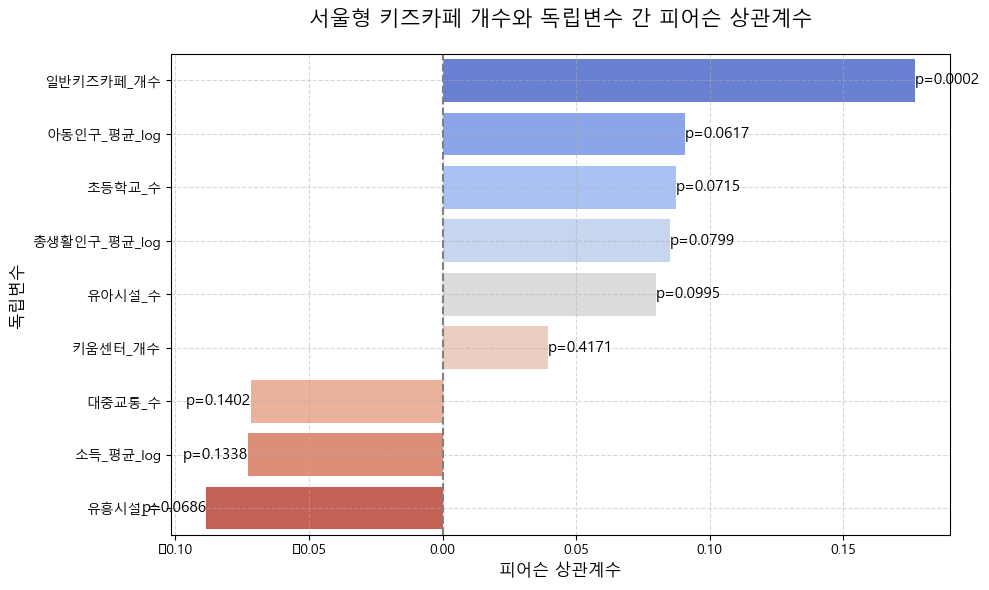

In [21]:
# 시각화 (정확한 일치화)
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='상관계수', y='변수명', data=correlation_df, palette='coolwarm', orient='h')

# 막대 위에 p-value 표시
for i, (corr, pval) in enumerate(zip(correlation_df['상관계수'], correlation_df['p-value'])):
    bar_plot.text(corr, i, f'p={pval:.4f}', color='black',
                  ha='left' if corr > 0 else 'right',
                  va='center', fontsize=11)

# 그래프 세부 설정
plt.title('서울형 키즈카페 개수와 독립변수 간 피어슨 상관계수', fontsize=15, pad=20)
plt.xlabel('피어슨 상관계수', fontsize=12)
plt.ylabel('독립변수', fontsize=12)
plt.axvline(0, color='grey', linestyle='--')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 2. 결과 변수 : 서울형 + 민간인증제 

In [103]:
# 결과변수 생성 (공공형 키즈카페)
df['공공형_키즈카페_개수'] = df['서울형키즈카페_개수'] + df['민간인증제키즈카페_개수']

# 독립변수 목록 (로그 변환된 변수를 사용)
independent_vars = [
    '일반키즈카페_개수', '키움센터_개수', '유흥시설_수',
    '대중교통_수', '초등학교_수', '유아시설_수',
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log'
]

# 피어슨 상관계수 분석 수행
correlation_results_public = []
for var in independent_vars:
    corr, p_value = pearsonr(df['공공형_키즈카페_개수'], df[var])
    correlation_results_public.append({
        '변수명': var,
        '피어슨 상관계수': round(corr, 4),
        'p-value': round(p_value, 4)
    })

# 결과 데이터프레임 생성 및 정렬
correlation_df_public = pd.DataFrame(correlation_results_public)\
                           .sort_values(by='피어슨 상관계수', ascending=False)

# 결과 출력
display(correlation_df_public)

,변수명,피어슨 상관계수,p-value
0,일반키즈카페_개수,0.5928,0.0000
4,초등학교_수,0.2052,0.0000
5,유아시설_수,0.2020,0.0000
7,총생활인구_평균_log,0.1716,0.0004
8,아동인구_평균_log,0.1596,0.0010
1,키움센터_개수,0.0426,0.3813
3,대중교통_수,0.0195,0.6888
2,유흥시설_수,-0.0098,0.8405
6,소득_평균_log,-0.0179,0.7135


### 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_22144\3280719318.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='상관계수', y='변수명', data=correlation_df, palette='coolwarm', orient='h')


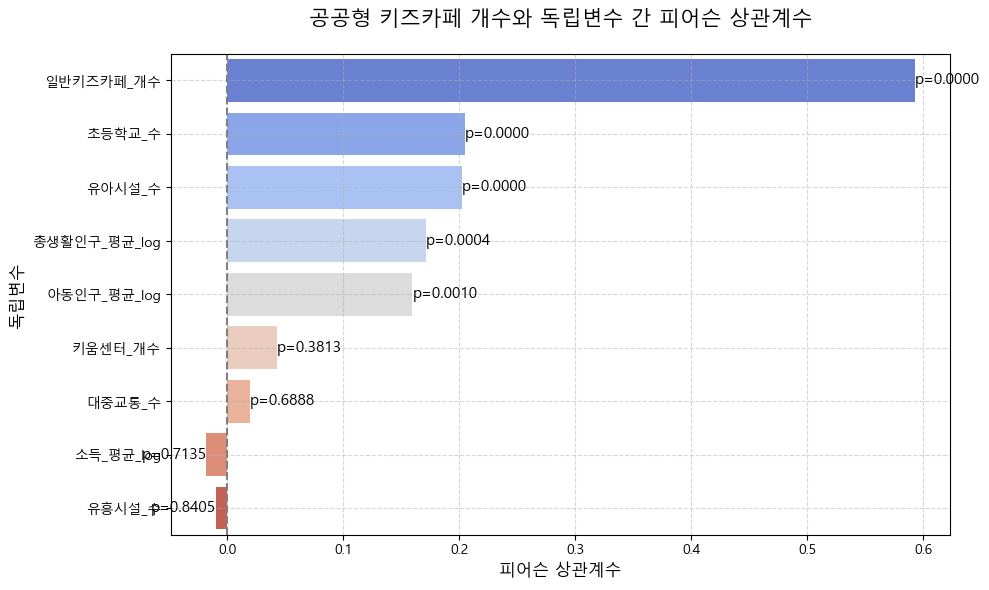

In [109]:
# 피어슨 상관계수 및 p-value 계산
correlation_results = []
for var in independent_vars:
    corr, pval = pearsonr(df[dependent_var], df[var])
    correlation_results.append({'변수명': var, '상관계수': corr, 'p-value': pval})

# 절댓값 기준 정렬 (중요!)
correlation_df = pd.DataFrame(correlation_results).reindex(
    pd.DataFrame(correlation_results)['상관계수'].abs().sort_values(ascending=False).index)

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='상관계수', y='변수명', data=correlation_df, palette='coolwarm', orient='h')

# 정확한 p-value 표시
for i, (corr, pval) in enumerate(zip(correlation_df['상관계수'], correlation_df['p-value'])):
    plt.text(corr, i, f'p={pval:.4f}', color='black',
             ha='left' if corr > 0 else 'right',
             va='center', fontsize=11)

# 그래프 세부 설정
plt.title('공공형 키즈카페 개수와 독립변수 간 피어슨 상관계수', fontsize=15, pad=20)
plt.xlabel('피어슨 상관계수', fontsize=12)
plt.ylabel('독립변수', fontsize=12)
plt.axvline(0, color='grey', linestyle='--')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 상관성 분석(2) - Point-Biserial
- 키즈카페 유무 (0/1)를 종속변수로 두었음
- 독립변수 : 일반키즈카페_개수, 키움센터_개수, 유흥시설_수, 대중교통_수(지하철+버스), 초등학교_수, 유아시설_수(유치원+어린이집), 소득_평균, 총생활인구_평균, 아동인구_평균

## 1. 결과 변수 : 서울형 키즈카페_유무

In [77]:
# 필요한 패키지 임포트
import pandas as pd
import numpy as np 
from scipy.stats import pointbiserialr

# 데이터 로드
df = pd.read_csv("./dataset_merge/[최종]분석용데이터_소득생활인구_아동인구_보간완료.csv", encoding='cp949')

# 평균값 계산
df['소득_평균'] = df[[col for col in df.columns if '소득_' in col]].mean(axis=1)
df['총생활인구_평균'] = df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1)
df['아동인구_평균'] = df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1)

# 로그(log1p) 변환 수행
df['소득_평균_log'] = np.log1p(df['소득_평균'])
df['총생활인구_평균_log'] = np.log1p(df['총생활인구_평균'])
df['아동인구_평균_log'] = np.log1p(df['아동인구_평균'])

# 변수 생성
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 서울형 키즈카페 유무 이진변수 생성
df['서울형키즈카페_유무'] = df['서울형키즈카페_개수'].apply(lambda x: 1 if x > 0 else 0)

# 독립변수 목록 (로그 변환된 변수를 사용)
independent_vars = [
    '일반키즈카페_개수', '키움센터_개수', '유흥시설_수',
    '대중교통_수', '초등학교_수', '유아시설_수',
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log'
]

# Point-Biserial 상관계수 분석 수행
pb_results = []
for var in independent_vars:
    corr, pval = pointbiserialr(df['서울형키즈카페_유무'], df[var])
    pb_results.append({'변수명': var, 'Point-Biserial 상관계수': round(corr, 4), 'p-value': round(pval, 4)})

# 결과 데이터프레임 생성 및 정렬
pb_df = pd.DataFrame(pb_results).sort_values(by='Point-Biserial 상관계수', ascending=False)

# 결과 확인
display(pb_df)

,변수명,Point-Biserial 상관계수,p-value
4,초등학교_수,0.1080,0.0260
8,아동인구_평균_log,0.0872,0.0725
5,유아시설_수,0.0627,0.1968
7,총생활인구_평균_log,0.0533,0.2732
0,일반키즈카페_개수,0.0503,0.3009
1,키움센터_개수,0.0137,0.7784
6,소득_평균_log,-0.0720,0.1382
3,대중교통_수,-0.0869,0.0736
2,유흥시설_수,-0.0991,0.0411


### 시각화

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

C:\Users\user\AppData\Local\Temp\ipykernel_22144\2895925049.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='상관계수', y='변수명', data=pb_df, palette='coolwarm', orient='h')
C:\Users\user\AppData\Local\Temp\ipykernel_22144\2895925049.py:33: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


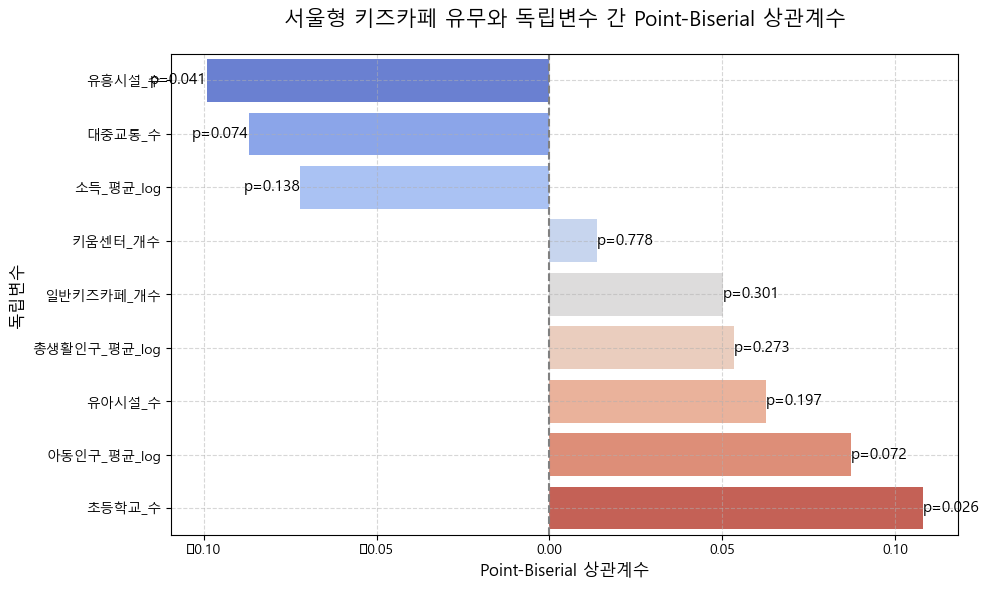

In [79]:
# 독립변수 설정
independent_vars = [
    '일반키즈카페_개수', '키움센터_개수', '유흥시설_수',
    '대중교통_수', '초등학교_수', '유아시설_수',
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log'
]

# Point-Biserial 상관계수 및 p-value 계산
pb_results = []
for var in independent_vars:
    corr, pval = pointbiserialr(df['서울형키즈카페_유무'], df[var])
    pb_results.append({'변수명': var, '상관계수': round(corr, 4), 'p-value': round(pval, 4)})

pb_df = pd.DataFrame(pb_results).sort_values(by='상관계수')

# 시각화 (p-value 막대 위에 명확히 표시)
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='상관계수', y='변수명', data=pb_df, palette='coolwarm', orient='h')

# p-value를 막대 위에 표시
for i, (corr, pval) in enumerate(zip(pb_df['상관계수'], pb_df['p-value'])):
    barplot.text(corr, i, f'p={pval:.3f}', color='black',
                 ha='left' if corr > 0 else 'right',
                 va='center', fontsize=11)

# 그래프 세부 설정
plt.title('서울형 키즈카페 유무와 독립변수 간 Point-Biserial 상관계수', fontsize=15, pad=20)
plt.xlabel('Point-Biserial 상관계수', fontsize=12)
plt.ylabel('독립변수', fontsize=12)
plt.axvline(0, color='grey', linestyle='--')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 2. 결과 변수 : 공공형 키즈카페_유무

In [85]:
# 공공형 키즈카페 유무(서울형+민간인증제) 이진변수 생성
df['공공형키즈카페_유무'] = (df['서울형키즈카페_개수'] + df['민간인증제키즈카페_개수']).apply(lambda x: 1 if x > 0 else 0)

# 독립변수 목록 (로그 변환된 변수를 사용)
independent_vars = [
    '일반키즈카페_개수', '키움센터_개수', '유흥시설_수',
    '대중교통_수', '초등학교_수', '유아시설_수',
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log'
]

# Point-Biserial 상관계수 및 p-value 계산
pb_results = []
for var in independent_vars:
    corr, pval = pointbiserialr(df['공공형키즈카페_유무'], df[var])
    pb_results.append({'변수명': var, 'Point-Biserial 상관계수': round(corr,4), 'p-value': round(pval,4)})

# 결과 데이터프레임 생성 및 정렬
pb_df = pd.DataFrame(pb_results).sort_values(by='Point-Biserial 상관계수', ascending=False)

# 결과 확인
display(pb_df)

,변수명,Point-Biserial 상관계수,p-value
0,일반키즈카페_개수,0.2103,0.0000
4,초등학교_수,0.1850,0.0001
5,유아시설_수,0.1711,0.0004
7,총생활인구_평균_log,0.1535,0.0015
8,아동인구_평균_log,0.1513,0.0018
1,키움센터_개수,0.0174,0.7207
6,소득_평균_log,0.0034,0.9441
3,대중교통_수,-0.0314,0.5190
2,유흥시설_수,-0.0572,0.2390


### 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_22144\149543020.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='상관계수', y='변수명', data=pb_df, palette='coolwarm', orient='h')
C:\Users\user\AppData\Local\Temp\ipykernel_22144\149543020.py:33: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


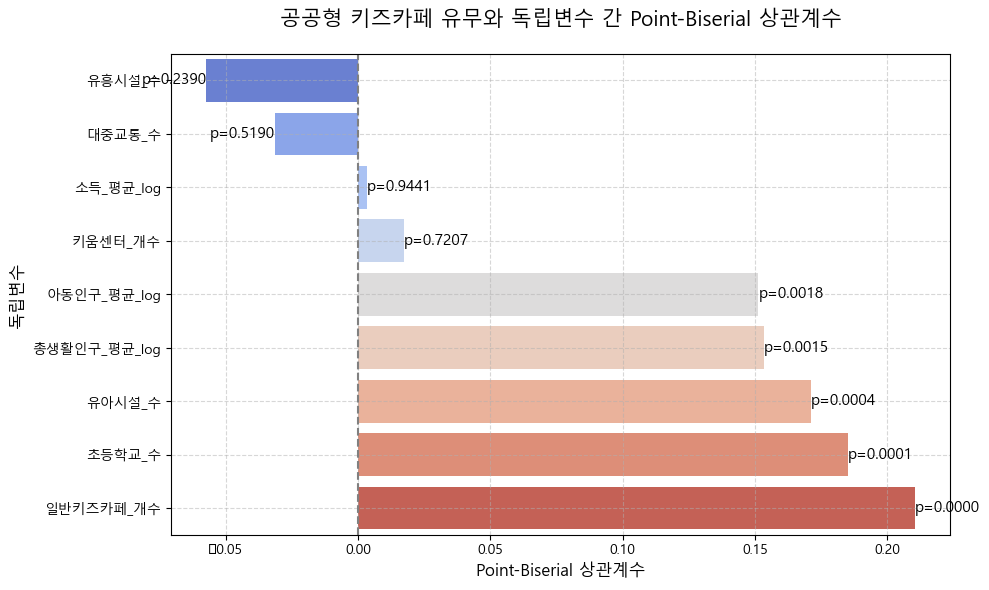

In [91]:
# 독립변수 설정
independent_vars = [
    '일반키즈카페_개수', '키움센터_개수', '유흥시설_수',
    '대중교통_수', '초등학교_수', '유아시설_수',
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log'
]

# Point-Biserial 상관계수 및 p-value 계산
pb_results = []
for var in independent_vars:
    corr, pval = pointbiserialr(df['공공형키즈카페_유무'], df[var])
    pb_results.append({'변수명': var, '상관계수': corr, 'p-value': pval})

pb_df = pd.DataFrame(pb_results).sort_values(by='상관계수')

# 시각화 (정렬 수정 완료)
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='상관계수', y='변수명', data=pb_df, palette='coolwarm', orient='h')

# p-value 표시 (정확히 매칭)
for i, (corr, pval) in enumerate(zip(pb_df['상관계수'], pb_df['p-value'])):
    barplot.text(corr, i, f'p={pval:.4f}', color='black',
                 ha='left' if corr > 0 else 'right',
                 va='center', fontsize=11)

# 그래프 세부 설정
plt.title('공공형 키즈카페 유무와 독립변수 간 Point-Biserial 상관계수', fontsize=15, pad=20)
plt.xlabel('Point-Biserial 상관계수', fontsize=12)
plt.ylabel('독립변수', fontsize=12)
plt.axvline(0, color='grey', linestyle='--')

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 상관성 분석(3) - 선형회귀(ols) 

## 서울형 키즈카페 

In [25]:
# 필요한 패키지 임포트
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 데이터 로드
df = pd.read_csv("./dataset_merge/[최종]분석용데이터_소득생활인구_아동인구_보간완료.csv", encoding='cp949')

# 평균 컬럼 생성 및 로그 변환
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))

# 추가 변수 생성
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 독립변수 설정
independent_vars = [
    '일반키즈카페_개수', '키움센터_개수', '유흥시설_수',
    '대중교통_수', '초등학교_수', '유아시설_수',
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log'
]

# 독립변수(X) 설정 및 상수항 추가
X = sm.add_constant(df[independent_vars])

# 종속변수(y) 설정 (서울형 키즈카페 개수)
y = df['서울형키즈카페_개수']

# 선형회귀(OLS) 모델 적합
model = sm.OLS(y, X).fit()

# 회귀계수 및 p-value만 간략히 추출 및 데이터프레임으로 출력
results_df = pd.DataFrame({
    '회귀계수(coef)': model.params.round(4),
    'p-value': model.pvalues.round(4)
})

# 과학적 표기법 비활성화 설정
pd.set_option('display.float_format', '{:.4f}'.format)

# 결과 확인
results_df

,회귀계수(coef),p-value
const,1.7976,0.1904
일반키즈카페_개수,0.0744,0.0012
키움센터_개수,0.0004,0.2876
유흥시설_수,-0.0002,0.3501
대중교통_수,-0.0001,0.7536
초등학교_수,0.0123,0.6097
유아시설_수,-0.0010,0.8691
소득_평균_log,-0.1650,0.0566
총생활인구_평균_log,0.0761,0.2853
아동인구_평균_log,0.0095,0.8729


### 선형성 확인

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


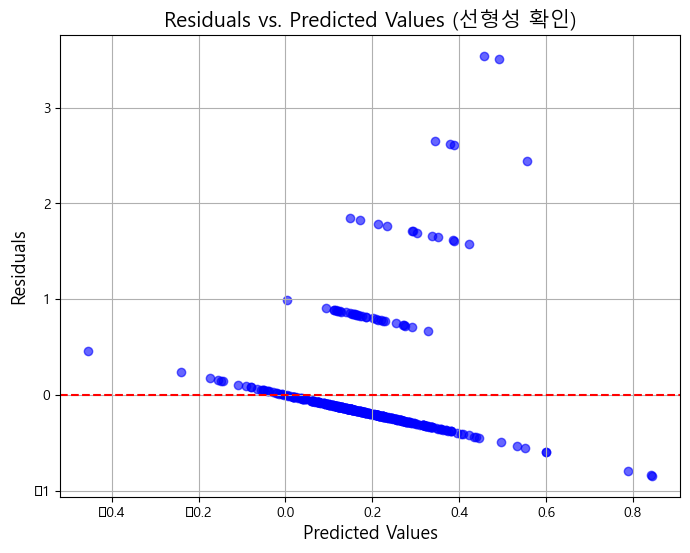

In [27]:
import matplotlib.pyplot as plt

# 모델 예측값 계산
predictions = model.predict(X)

# 잔차(residual) 계산
residuals = y - predictions

# 잔차 산점도(Residual Plot) 그리기
plt.figure(figsize=(8, 6))
plt.scatter(predictions, residuals, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values', fontsize=13)
plt.ylabel('Residuals', fontsize=13)
plt.title('Residuals vs. Predicted Values (선형성 확인)', fontsize=15)
plt.grid(True)
plt.show()

### 등분산성 확인

In [29]:
# Breusch-Pagan Test 수행 코드
import statsmodels.stats.api as sms

# Breusch-Pagan Test 실행
bp_test = sms.het_breuschpagan(residuals, X)

# 결과 출력
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
bp_results = dict(zip(labels, bp_test))

# 결과 확인
bp_results

{'Lagrange multiplier statistic': 42.46867402643139,
 'p-value': 2.697658871257724e-06,
 'f-value': 5.119261126628999,
 'f p-value': 1.3788359396331983e-06}

## 공공형 키즈카페 

In [31]:
# 필요한 패키지 임포트
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 데이터 로드
df = pd.read_csv("./dataset_merge/[최종]분석용데이터_소득생활인구_아동인구_보간완료.csv", encoding='cp949')

# 평균 컬럼 생성 및 로그 변환
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))

# 결과변수 생성 (공공형 키즈카페 개수)
df['공공형_키즈카페_개수'] = df['서울형키즈카페_개수'] + df['민간인증제키즈카페_개수']

# 추가 변수 생성
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 독립변수 설정
independent_vars = [
    '일반키즈카페_개수', '키움센터_개수', '유흥시설_수',
    '대중교통_수', '초등학교_수', '유아시설_수',
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log'
]

# 독립변수(X) 설정 및 상수항 추가
X = sm.add_constant(df[independent_vars])

# 종속변수(y) 설정
y = df['공공형_키즈카페_개수']

# 선형회귀(OLS) 모델 적합
model = sm.OLS(y, X).fit()

# 회귀계수 및 p-value 간략히 추출 및 데이터프레임으로 출력
results_df = pd.DataFrame({
    '회귀계수(coef)': model.params.round(4),
    'p-value': model.pvalues.round(4)
})

# 결과 확인
display(results_df)

,회귀계수(coef),p-value
const,3.5163,0.1212
일반키즈카페_개수,0.5291,0.0000
키움센터_개수,0.0004,0.5006
유흥시설_수,-0.0003,0.3806
대중교통_수,0.0002,0.6697
초등학교_수,0.0742,0.0636
유아시설_수,0.0070,0.4962
소득_평균_log,-0.2202,0.1233
총생활인구_평균_log,0.0062,0.9582
아동인구_평균_log,-0.0738,0.4521


### 선형성 확인 

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


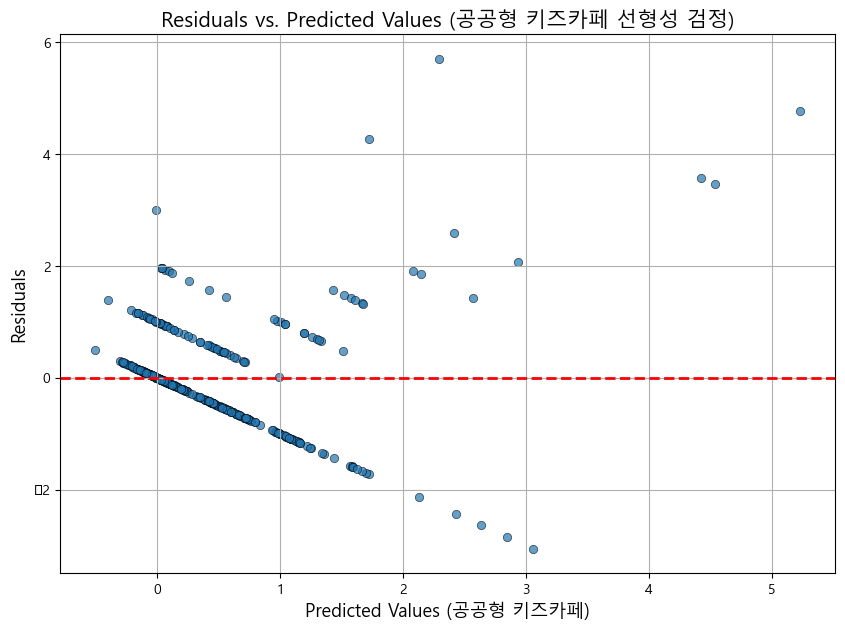

In [39]:
# 필요한 패키지 임포트 (모델 이후 추가)
import matplotlib.pyplot as plt

# 모델 예측값 계산
predictions = model.predict(X)

# 잔차(residual) 계산
residuals = y - predictions

# 잔차 산점도 그리기 (선형성 검정)
plt.figure(figsize=(10, 7))
plt.scatter(predictions, residuals, alpha=0.7, edgecolors='k', linewidths=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# 라벨 및 제목 설정
plt.xlabel('Predicted Values (공공형 키즈카페)', fontsize=13)
plt.ylabel('Residuals', fontsize=13)
plt.title('Residuals vs. Predicted Values (공공형 키즈카페 선형성 검정)', fontsize=15)
plt.grid(True)

# 그래프 표시
plt.show()


# 상관성 분석(4) - 랜덤포레스트 비선형 모델 중요도 산출

## 결과 변수 : 서울형 키즈카페

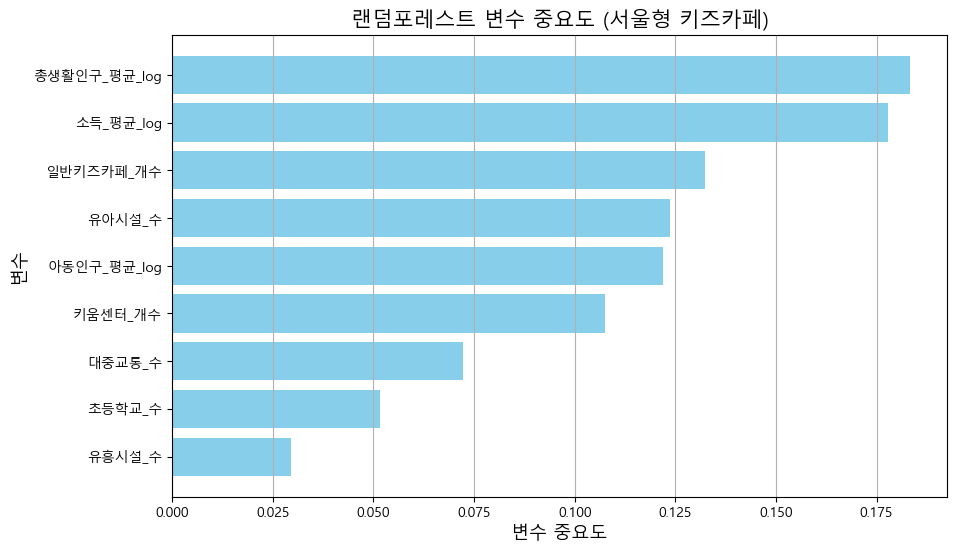

,변수,중요도
0,총생활인구_평균_log,0.1833
1,소득_평균_log,0.1778
2,일반키즈카페_개수,0.1323
3,유아시설_수,0.1237
4,아동인구_평균_log,0.1220
5,키움센터_개수,0.1076
6,대중교통_수,0.0723
7,초등학교_수,0.0516
8,유흥시설_수,0.0294


In [41]:
# 패키지 임포트
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 데이터 로드
df = pd.read_csv("./dataset_merge/[최종]분석용데이터_소득생활인구_아동인구_보간완료.csv", encoding='cp949')

# 평균 컬럼 생성 및 로그 변환
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))

# 추가 변수 생성
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 독립변수 설정
independent_vars = [
    '일반키즈카페_개수', '키움센터_개수', '유흥시설_수',
    '대중교통_수', '초등학교_수', '유아시설_수',
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log'
]

X = df[independent_vars]
y = df['서울형키즈카페_개수']

# 랜덤포레스트 모델 생성 및 적합
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# 변수 중요도 추출
importance_df = pd.DataFrame({
    '변수': independent_vars,
    '중요도': rf_model.feature_importances_
}).sort_values(by='중요도', ascending=False)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['변수'][::-1], importance_df['중요도'][::-1], color='skyblue')
plt.xlabel('변수 중요도', fontsize=13)
plt.ylabel('변수', fontsize=13)
plt.title('랜덤포레스트 변수 중요도 (서울형 키즈카페)', fontsize=15)
plt.grid(axis='x')
plt.show()

# 변수 중요도 결과 확인
display(importance_df.reset_index(drop=True))

### shap 분석

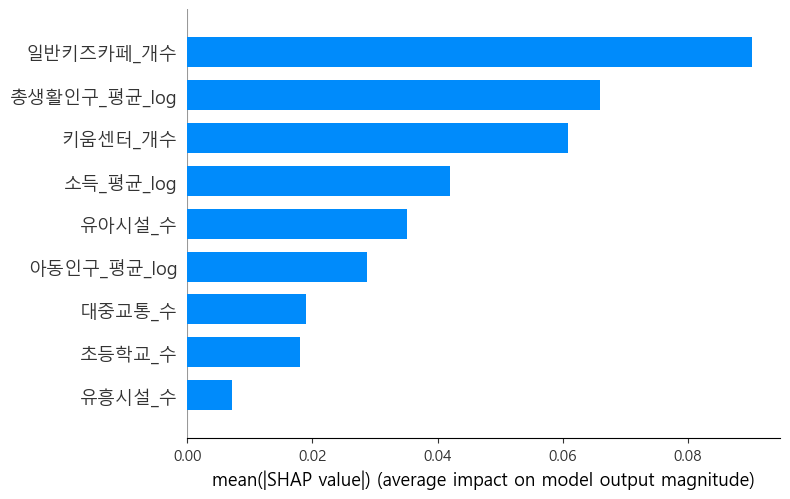

C:\Users\user\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:1153: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  pl.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


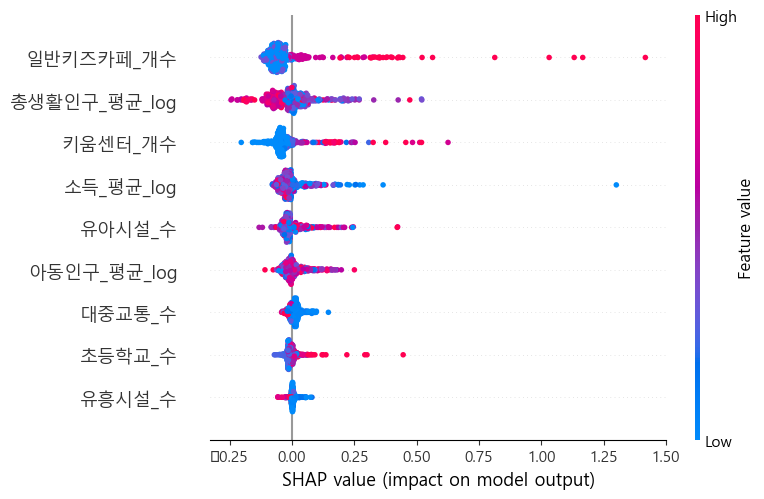

In [43]:
# SHAP 분석을 위한 패키지 설치 (아직 설치 안 했다면)
!pip install shap

# 패키지 임포트
import shap
import matplotlib.pyplot as plt

# SHAP explainer 생성 (랜덤포레스트 모델 기반)
explainer = shap.TreeExplainer(rf_model)

# SHAP values 계산
shap_values = explainer.shap_values(X)

# 변수 중요도 및 방향성 시각화 (요약 플롯)
shap.summary_plot(shap_values, X, plot_type="bar")

# 개별 변수별 상세한 영향력 플롯 (옵션, 추가적 실행 추천)
shap.summary_plot(shap_values, X)

## 결과 변수 : 공공형 키즈카페

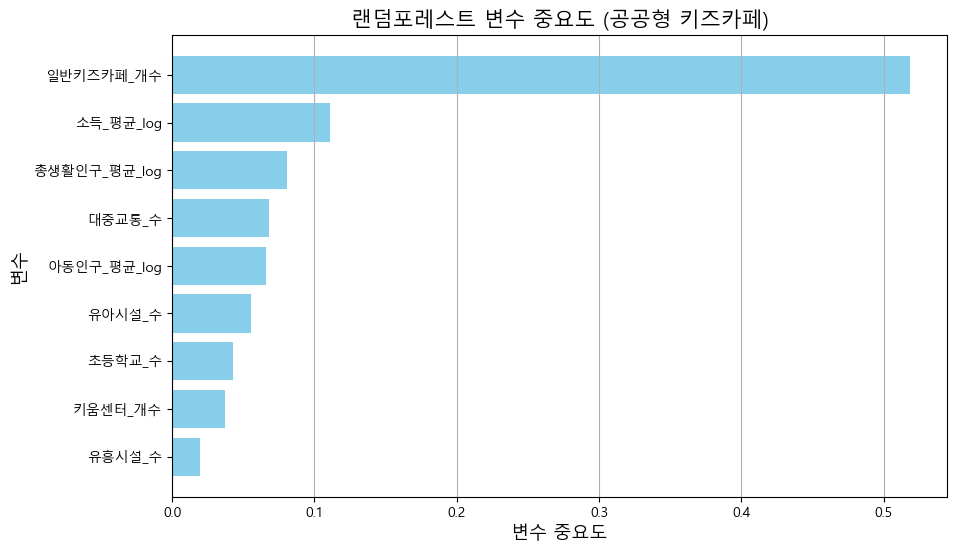

,변수,중요도
0,일반키즈카페_개수,0.5185
1,소득_평균_log,0.1112
2,총생활인구_평균_log,0.0810
3,대중교통_수,0.0678
4,아동인구_평균_log,0.0663
5,유아시설_수,0.0556
6,초등학교_수,0.0425
7,키움센터_개수,0.0375
8,유흥시설_수,0.0196


In [45]:
# 데이터 로드
df = pd.read_csv("./dataset_merge/[최종]분석용데이터_소득생활인구_아동인구_보간완료.csv", encoding='cp949')

# 평균 컬럼 생성 및 로그 변환
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))

# 추가 변수 생성
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 독립변수 설정
independent_vars = [
    '일반키즈카페_개수', '키움센터_개수', '유흥시설_수',
    '대중교통_수', '초등학교_수', '유아시설_수',
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log'
]

X_rf = df[independent_vars]

# 종속변수 (공공형 키즈카페 개수: 서울형 + 민간인증제)
y_rf_public = df['서울형키즈카페_개수'] + df['민간인증제키즈카페_개수']

# 랜덤포레스트 모델 생성 및 적합
rf_public = RandomForestRegressor(n_estimators=100, random_state=42)
rf_public.fit(X_rf, y_rf_public)

# 변수 중요도 추출
feature_importance_public = pd.DataFrame({
    '변수': independent_vars,
    '중요도': rf_public.feature_importances_
}).sort_values(by='중요도', ascending=False).reset_index(drop=True)

# 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_public['변수'][::-1], feature_importance_public['중요도'][::-1], color='skyblue')
plt.xlabel('변수 중요도', fontsize=13)
plt.ylabel('변수', fontsize=13)
plt.title('랜덤포레스트 변수 중요도 (공공형 키즈카페)', fontsize=15)
plt.grid(axis='x')
plt.show()

# 중요도 결과 출력
display(feature_importance_public)

### SHAP 분석

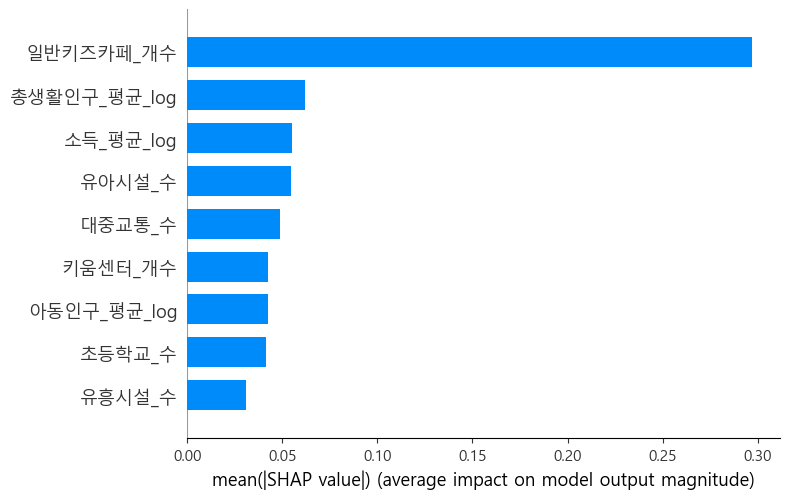

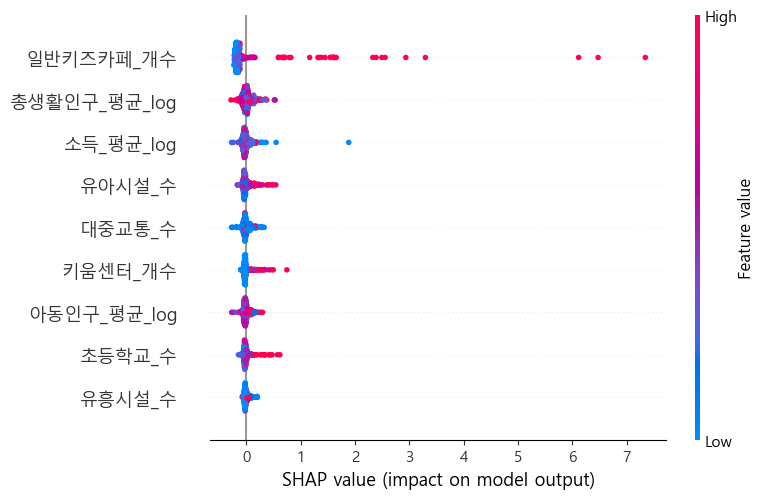

In [47]:
# SHAP 분석 패키지 설치 (미설치시만 실행)
!pip install shap

# 라이브러리 임포트
import shap
import matplotlib.pyplot as plt

# 랜덤포레스트 모델 기반 SHAP explainer 생성
explainer = shap.TreeExplainer(rf_public)

# SHAP values 계산
shap_values = explainer.shap_values(X_rf)

# SHAP 변수 중요도 시각화 (Bar Plot)
shap.summary_plot(shap_values, X_rf, plot_type="bar")

# 변수별 상세 영향력 시각화 (요약 플롯)
shap.summary_plot(shap_values, X_rf)

# 상관성 분석(5) - 스피어만 상관계수

## 결과 변수 : 서울형 키즈카페 개수

In [13]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# 데이터 로드 (파일 경로 확인 필수!)
df = pd.read_csv(r"G:\내 드라이브\DIMA5\0. 프로젝트\dataset_merge\분석용데이터.csv", encoding='cp949')

# 필요한 변수 생성 (로그 변환)
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 종속변수 설정
dependent_var = '서울형키즈카페_개수'

# 독립변수 설정
independent_vars = [
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log', 
    '일반키즈카페_개수', '유아시설_수', '키움센터_개수', 
    '대중교통_수', '초등학교_수', '유흥시설_수'
]

# 결과를 저장할 빈 리스트 생성
results = []

# 각 독립변수와 종속변수 간의 스피어만 상관계수 및 p-value 계산
for var in independent_vars:
    coef, pvalue = spearmanr(df[dependent_var], df[var])
    results.append({
        '독립변수': var,
        '스피어만 상관계수': round(coef, 4),
        'p-value': round(pvalue, 4)
    })

# 결과 데이터프레임 생성 및 상관계수 크기 순 정렬
df_results = pd.DataFrame(results).sort_values(by='스피어만 상관계수', key=abs, ascending=False)

# 결과 출력
print(df_results.reset_index(drop=True))

           독립변수  스피어만 상관계수  p-value
0        초등학교_수     0.1017   0.0361
1     일반키즈카페_개수     0.0934   0.0542
2   아동인구_평균_log     0.0783   0.1069
3        유아시설_수     0.0777   0.1095
4       키움센터_개수     0.0521   0.2839
5     소득_평균_log    -0.0498   0.3059
6        유흥시설_수    -0.0481   0.3228
7  총생활인구_평균_log     0.0360   0.4596
8        대중교통_수     0.0306   0.5290


### 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_8456\683777545.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='상관계수', y='독립변수', data=df_results, palette=colors)


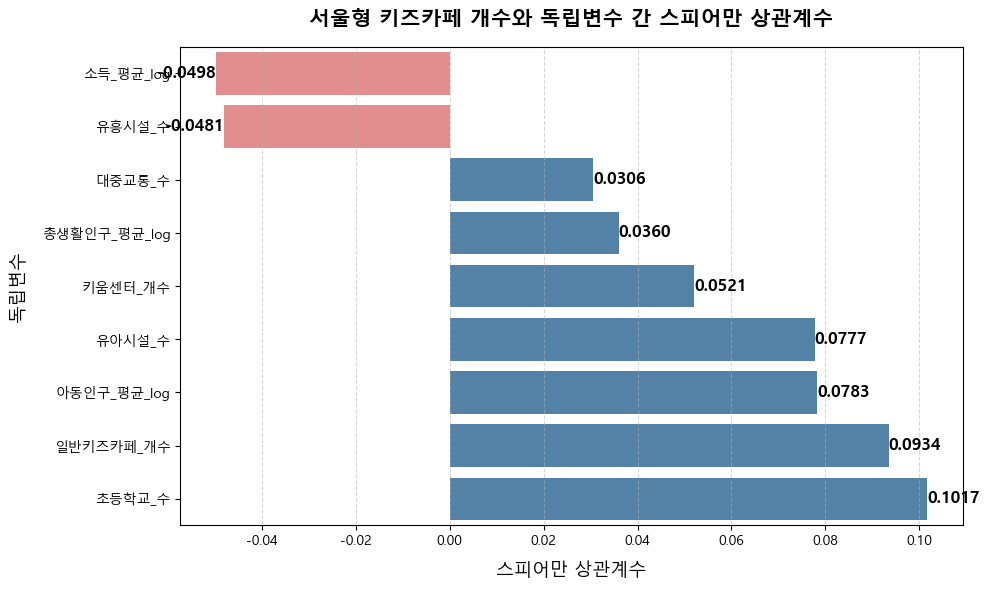

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 스피어만 상관 분석
results = []
for var in independent_vars:
    coef, pvalue = spearmanr(df[dependent_var], df[var])
    results.append({'독립변수': var, '상관계수': coef, 'p-value': pvalue})

df_results = pd.DataFrame(results).sort_values(by='상관계수', ascending=True)

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
colors = ['steelblue' if x > 0 else 'lightcoral' for x in df_results['상관계수']]
sns.barplot(x='상관계수', y='독립변수', data=df_results, palette=colors)

plt.title('서울형 키즈카페 개수와 독립변수 간 스피어만 상관계수', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('스피어만 상관계수', fontsize=13, labelpad=10)
plt.ylabel('독립변수', fontsize=13, labelpad=10)

# 그래프 내 상관계수 표시
for index, value in enumerate(df_results['상관계수']):
    plt.text(value, index, f'{value:.4f}', va='center',
             ha='left' if value > 0 else 'right', fontsize=12, color='black', fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 결과 변수 : 공공형 키즈카페 개수

In [25]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from scipy.stats import spearmanr

# 데이터 로드 (파일 경로 확인 필수!)
df = pd.read_csv(r"G:\내 드라이브\DIMA5\0. 프로젝트\dataset_merge\분석용데이터.csv", encoding='cp949')

# 필요한 변수 생성 (로그 변환)
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 공공형 키즈카페 개수 정의 (서울형 + 민간인증제 키즈카페)
df['공공형키즈카페_개수'] = df['서울형키즈카페_개수'] + df['민간인증제키즈카페_개수']

# 종속변수 설정
dependent_var = '공공형키즈카페_개수'

# 독립변수 설정
independent_vars = [
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log',
    '일반키즈카페_개수', '유아시설_수', '키움센터_개수',
    '대중교통_수', '초등학교_수', '유흥시설_수'
]

# 결과를 저장할 빈 리스트 생성
results = []

# 각 독립변수와 종속변수 간의 스피어만 상관계수 및 p-value 계산
for var in independent_vars:
    coef, pvalue = spearmanr(df[dependent_var], df[var])
    results.append({
        '독립변수': var,
        '스피어만 상관계수': round(coef, 4),
        'p-value': round(pvalue, 4)
    })

# 결과 데이터프레임 생성 및 상관계수 크기 순 정렬
df_results = pd.DataFrame(results).sort_values(by='스피어만 상관계수', key=abs, ascending=False)

# 결과 출력
print(df_results.reset_index(drop=True))

           독립변수  스피어만 상관계수  p-value
0     일반키즈카페_개수     0.1849   0.0001
1   아동인구_평균_log     0.1638   0.0007
2  총생활인구_평균_log     0.1583   0.0011
3        유아시설_수     0.1549   0.0014
4        초등학교_수     0.1534   0.0015
5        대중교통_수     0.1110   0.0221
6       키움센터_개수     0.0612   0.2079
7        유흥시설_수     0.0516   0.2889
8     소득_평균_log     0.0360   0.4595


### 시각화

C:\Users\user\AppData\Local\Temp\ipykernel_8456\463665062.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='상관계수', y='독립변수', data=df_results, palette=colors)


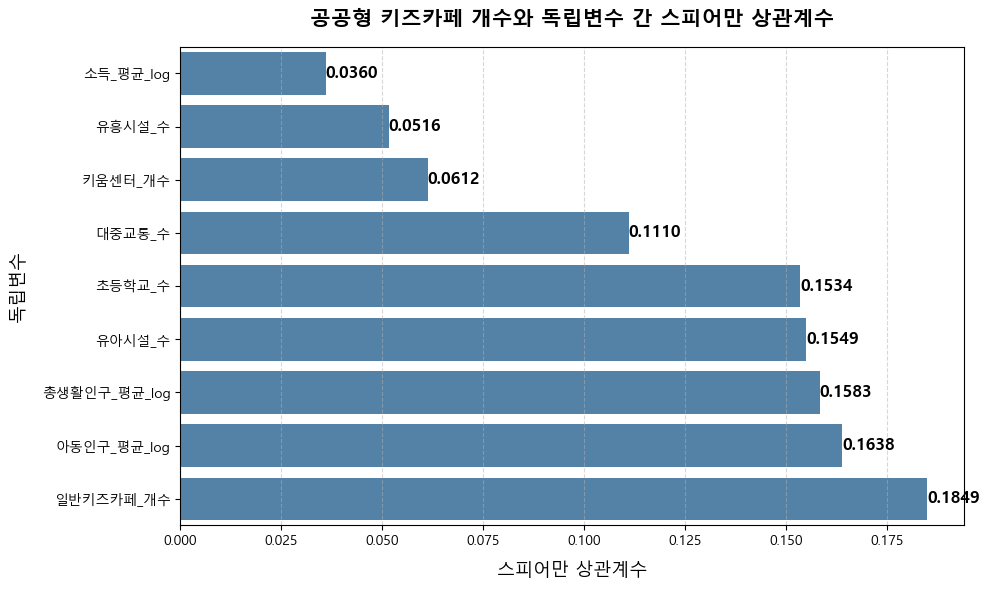

In [27]:
# 분석 수행
results = []
for var in independent_vars:
    coef, pvalue = spearmanr(df[dependent_var], df[var])
    results.append({'독립변수': var, '상관계수': coef, 'p-value': pvalue})

df_results = pd.DataFrame(results).sort_values(by='상관계수', ascending=True)

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
colors = ['steelblue' if x > 0 else 'lightcoral' for x in df_results['상관계수']]
sns.barplot(x='상관계수', y='독립변수', data=df_results, palette=colors)

plt.title('공공형 키즈카페 개수와 독립변수 간 스피어만 상관계수', fontsize=15, fontweight='bold', pad=15)
plt.xlabel('스피어만 상관계수', fontsize=13, labelpad=10)
plt.ylabel('독립변수', fontsize=13, labelpad=10)

# 그래프 내 상관계수 표시
for index, value in enumerate(df_results['상관계수']):
    plt.text(value, index, f'{value:.4f}', va='center',
             ha='left' if value > 0 else 'right', fontsize=12, color='black', fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 상관성 분석(5) - 의사결정 트리

## 결과 변수 : 서울형 키즈카페 

Mean Squared Error (MSE): 0.2752
Root Mean Squared Error (RMSE): 0.5246
R-squared: -0.1009


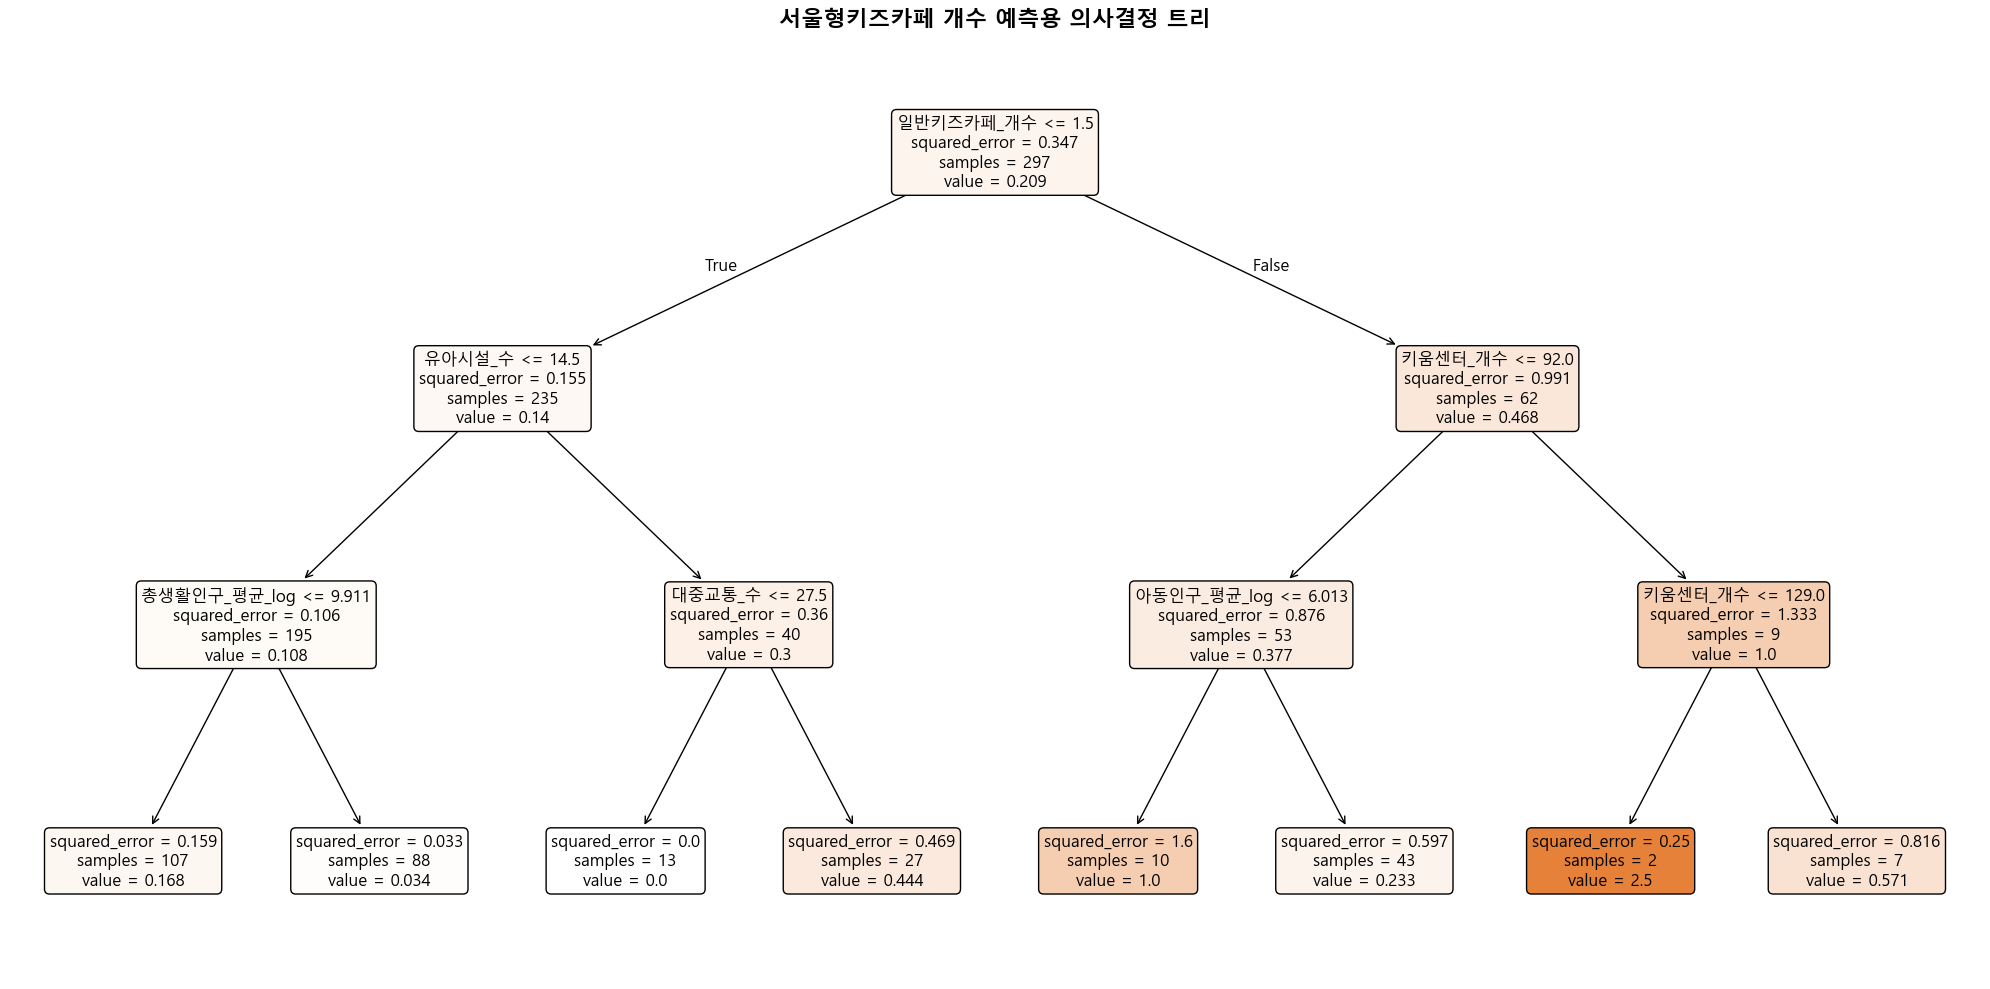

In [29]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv(r"G:\내 드라이브\DIMA5\0. 프로젝트\dataset_merge\분석용데이터.csv", encoding='cp949')

# 변수 생성
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 종속변수 설정
y = df['서울형키즈카페_개수']

# 독립변수 설정
X = df[[
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log',
    '일반키즈카페_개수', '유아시설_수', '키움센터_개수',
    '대중교통_수', '초등학교_수', '유흥시설_수'
]]

# 데이터 분할 (학습:테스트 = 7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정 트리 회귀 모델 생성 및 학습 (최대 깊이 조정 가능)
dt_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_reg.fit(X_train, y_train)

# 예측 수행
y_pred = dt_reg.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, feature_names=X.columns, filled=True, rounded=True, fontsize=12)
plt.title("서울형키즈카페 개수 예측용 의사결정 트리", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 결과 변수 : 공공형 키즈카페

Mean Squared Error (MSE): 0.5900
Root Mean Squared Error (RMSE): 0.7681
R-squared: 0.5952


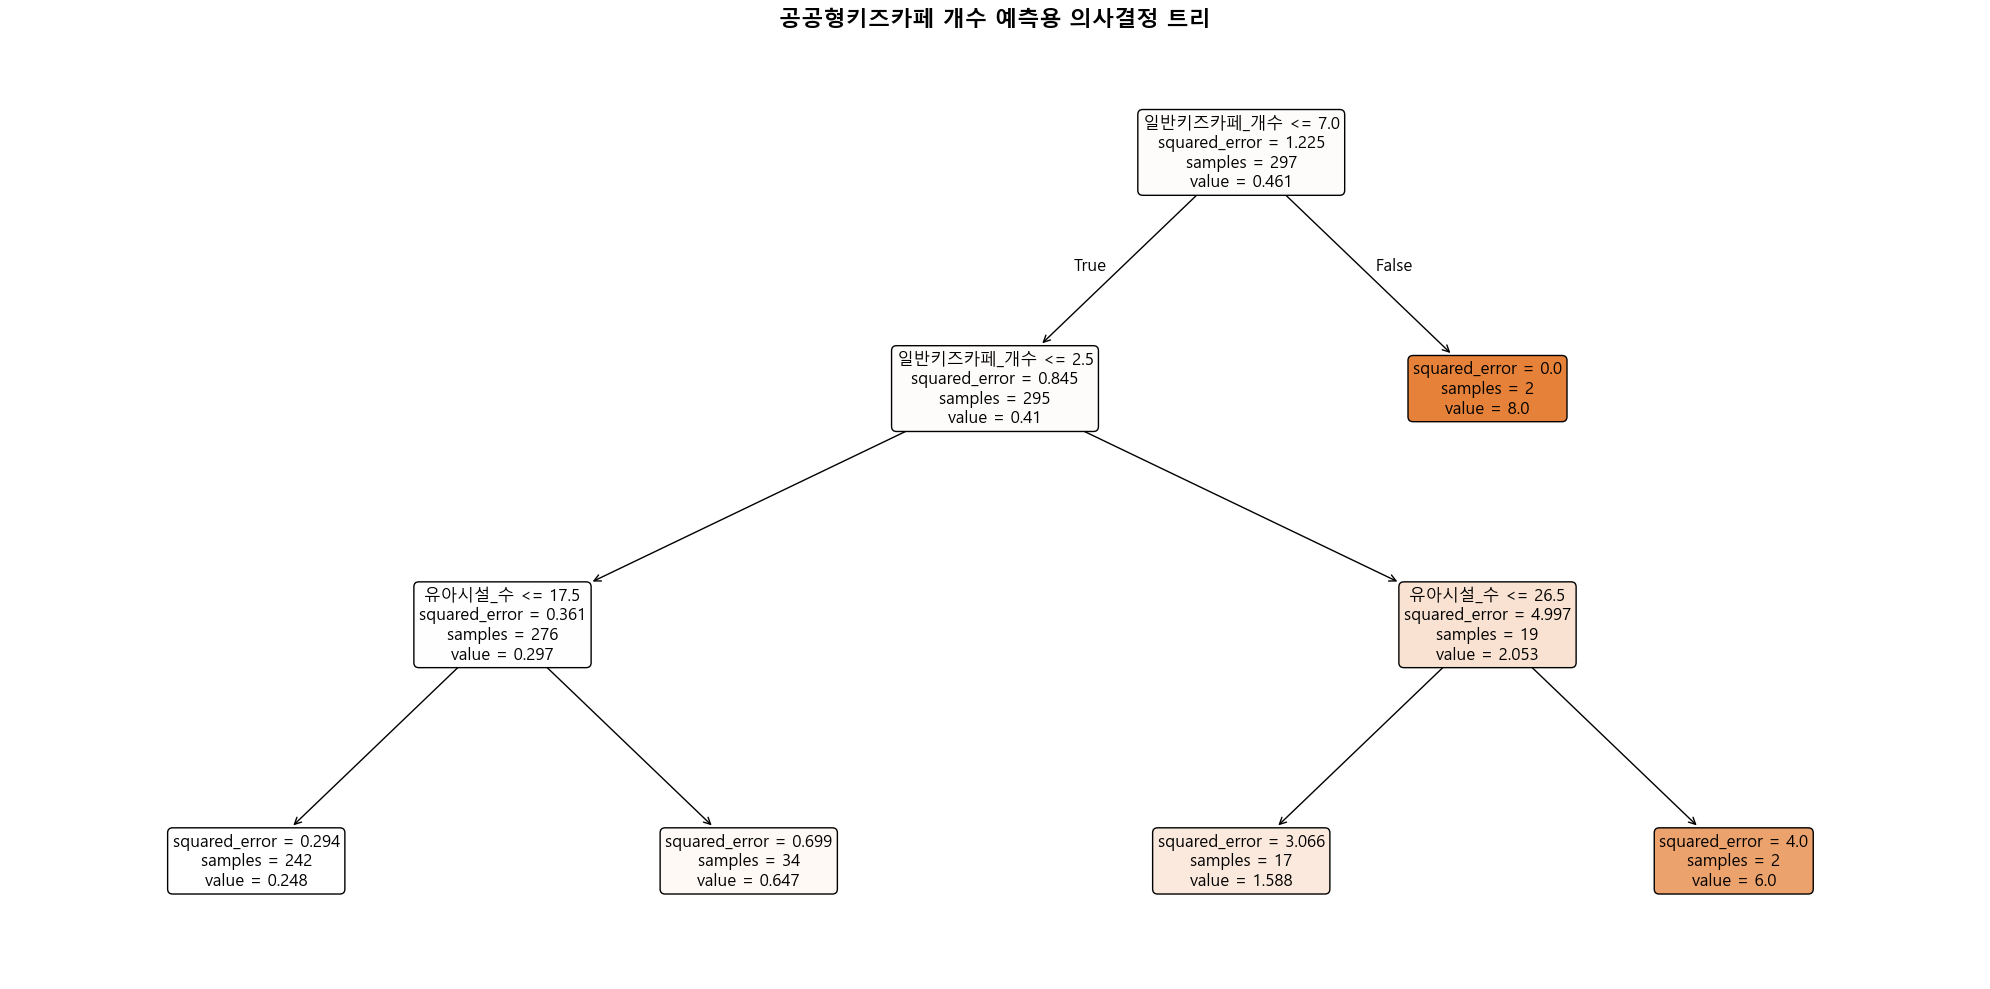

In [31]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv(r"G:\내 드라이브\DIMA5\0. 프로젝트\dataset_merge\분석용데이터.csv", encoding='cp949')

# 추가 변수 생성
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 공공형 키즈카페 개수 정의 (서울형 + 민간인증제 키즈카페)
df['공공형키즈카페_개수'] = df['서울형키즈카페_개수'] + df['민간인증제키즈카페_개수']

# 종속변수 설정
y = df['공공형키즈카페_개수']

# 독립변수 설정
X = df[[
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log',
    '일반키즈카페_개수', '유아시설_수', '키움센터_개수',
    '대중교통_수', '초등학교_수', '유흥시설_수'
]]

# 데이터 분할 (학습:테스트 = 7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정 트리 회귀 모델 생성 및 학습
dt_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_reg.fit(X_train, y_train)

# 예측 수행
y_pred = dt_reg.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, feature_names=X.columns, filled=True, rounded=True, fontsize=12)
plt.title("공공형키즈카페 개수 예측용 의사결정 트리", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


### 민간인증제 키즈카페 예측용 의사결정 트리

Mean Squared Error (MSE): 0.4900
Root Mean Squared Error (RMSE): 0.7000
R-squared: 0.5623


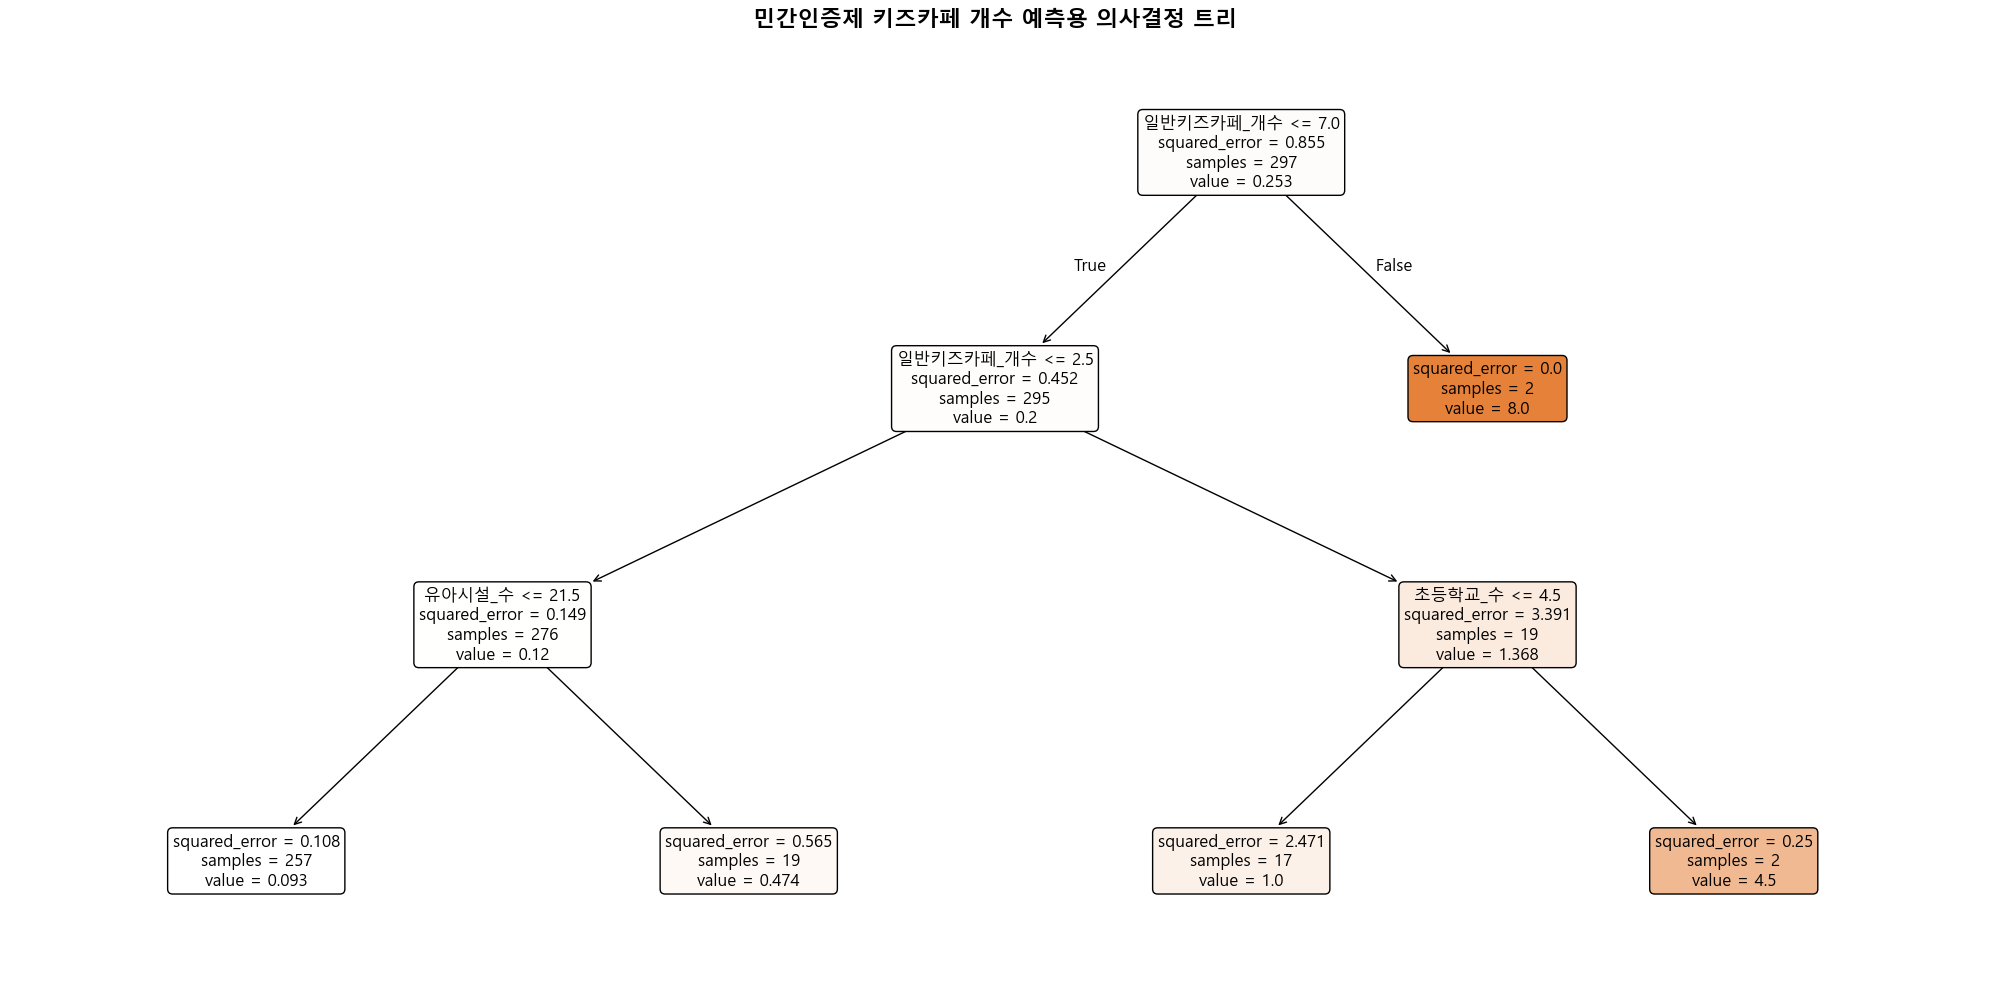

In [33]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv(r"G:\내 드라이브\DIMA5\0. 프로젝트\dataset_merge\분석용데이터.csv", encoding='cp949')

# 추가 변수 생성
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 종속변수 설정
y = df['민간인증제키즈카페_개수']

# 독립변수 설정
X = df[[
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log',
    '일반키즈카페_개수', '유아시설_수', '키움센터_개수',
    '대중교통_수', '초등학교_수', '유흥시설_수'
]]

# 데이터 분할 (학습:테스트 = 7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정 트리 회귀 모델 생성 및 학습
dt_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_reg.fit(X_train, y_train)

# 예측 수행
y_pred = dt_reg.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, feature_names=X.columns, filled=True, rounded=True, fontsize=12)
plt.title("민간인증제 키즈카페 개수 예측용 의사결정 트리", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### 일반키즈카페 예측용 의사결정 트리

Mean Squared Error (MSE): 1.6455
Root Mean Squared Error (RMSE): 1.2828
R-squared: -0.0493


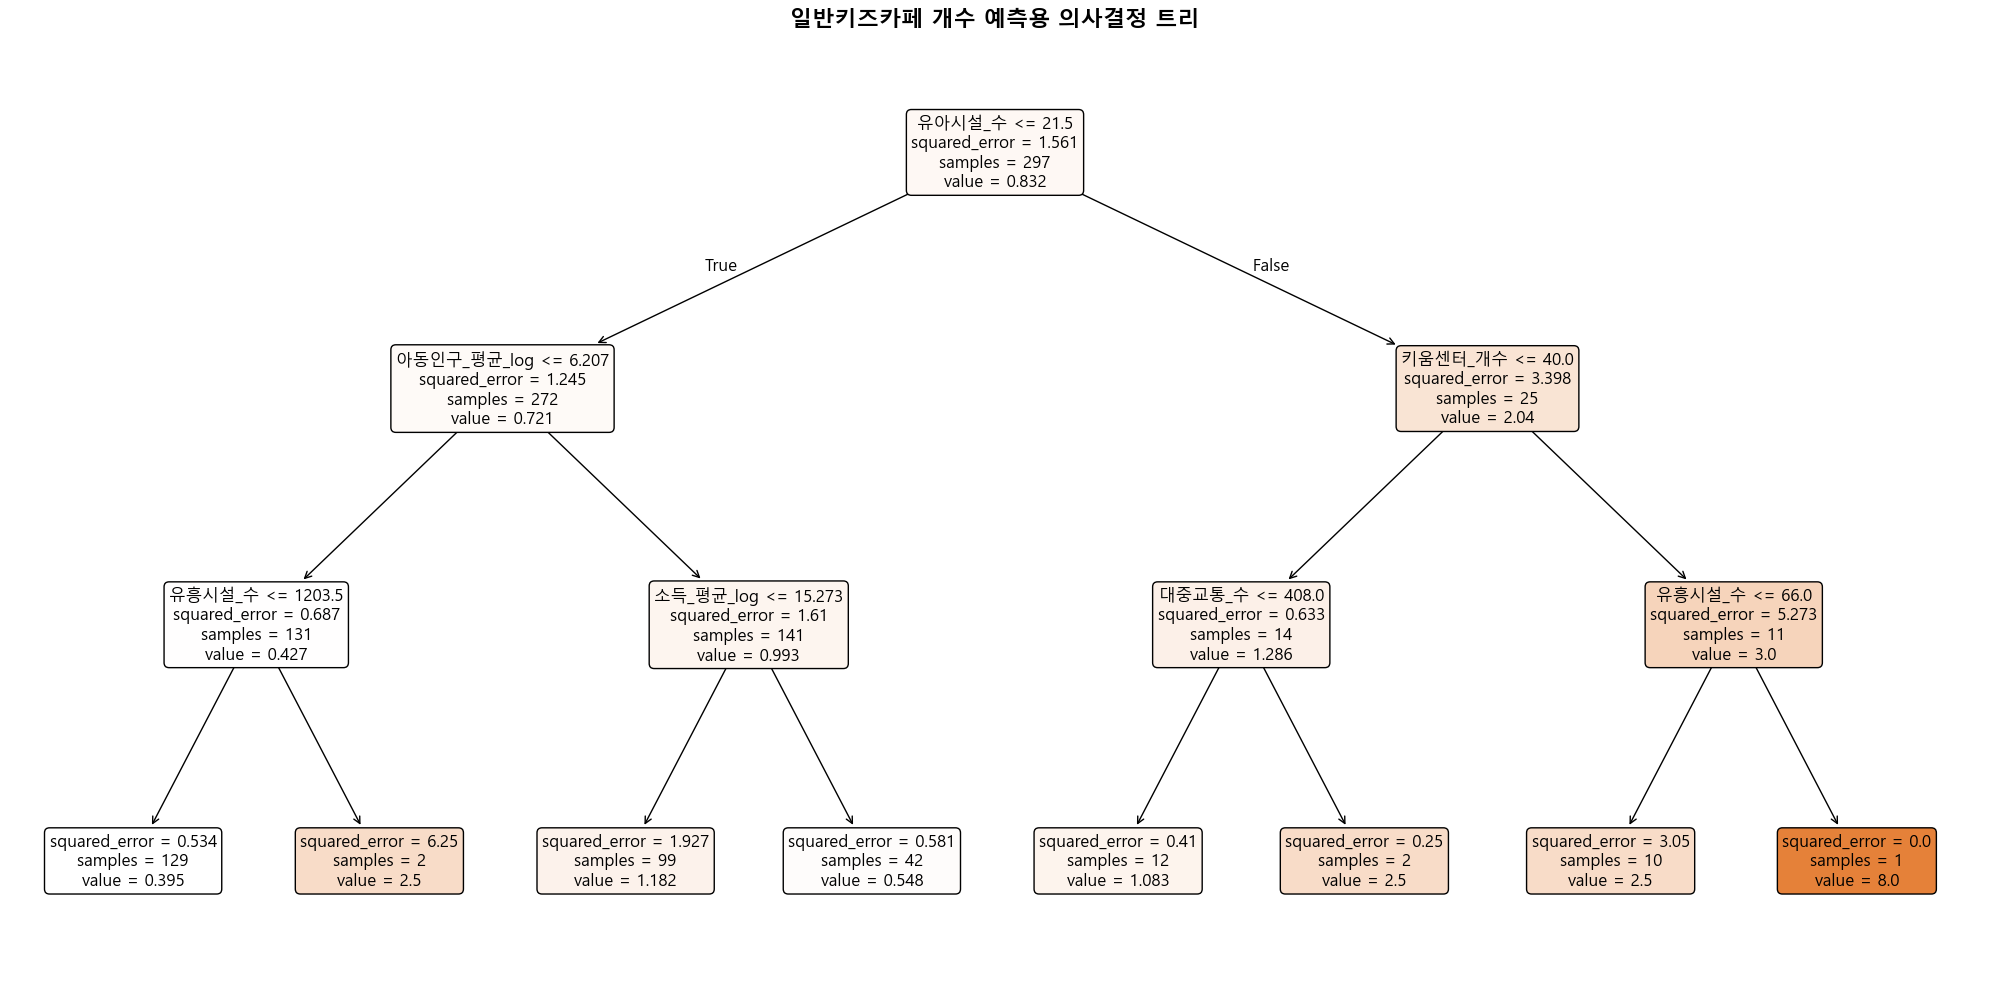

In [35]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 한글 폰트 설정 (윈도우 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv(r"G:\내 드라이브\DIMA5\0. 프로젝트\dataset_merge\분석용데이터.csv", encoding='cp949')

# 추가 변수 생성
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 종속변수 설정
y = df['일반키즈카페_개수']

# 독립변수 설정
X = df[[
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log',
    '유아시설_수', '키움센터_개수', '대중교통_수',
    '초등학교_수', '유흥시설_수'
]]

# 데이터 분할 (학습:테스트 = 7:3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 의사결정 트리 회귀 모델 생성 및 학습
dt_reg = DecisionTreeRegressor(max_depth=3, random_state=42)
dt_reg.fit(X_train, y_train)

# 예측 수행
y_pred = dt_reg.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared: {r2:.4f}")

# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(dt_reg, feature_names=X.columns, filled=True, rounded=True, fontsize=12)
plt.title("일반키즈카페 개수 예측용 의사결정 트리", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# 가중치 도출(1) - 랜덤 포레스트 비선형 모델 중요도 기반

## 결과 변수 : 서울형 키즈페페

In [51]:
# SHAP 라이브러리 설치 (미설치 시 실행)
!pip install shap

# 필요한 라이브러리 로드
import shap
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 랜덤포레스트 모델 (서울형 키즈카페 기준)
rf_seoul = RandomForestRegressor(n_estimators=100, random_state=42)
rf_seoul.fit(X_rf, df['서울형키즈카페_개수'])

# SHAP explainer 생성 및 SHAP values 계산
explainer_seoul = shap.TreeExplainer(rf_seoul)
shap_values_seoul = explainer_seoul.shap_values(X_rf)

# SHAP 평균값 및 방향성 계산
shap_mean_seoul = np.mean(shap_values_seoul, axis=0)
shap_sign_seoul = np.sign(shap_mean_seoul)

# 랜덤포레스트 변수 중요도 추출
importance_seoul = rf_seoul.feature_importances_

# 최종 가중치 계산 (서울형 키즈카페 기준)
weights_seoul = importance_seoul * shap_sign_seoul

# 결과를 DataFrame으로 정리
weights_df_seoul = pd.DataFrame({
    '변수': X_rf.columns,
    '랜덤포레스트_중요도': importance_seoul,
    'SHAP_평균값': shap_mean_seoul,
    'SHAP_방향성': shap_sign_seoul,
    '최종_가중치': weights_seoul
}).sort_values(by='최종_가중치', key=abs, ascending=False).reset_index(drop=True)

# 결과 확인
display(weights_df_seoul)


,변수,랜덤포레스트_중요도,SHAP_평균값,SHAP_방향성,최종_가중치
0,총생활인구_평균_log,0.1833,-0.0010,-1.0000,-0.1833
1,소득_평균_log,0.1778,0.0018,1.0000,0.1778
2,일반키즈카페_개수,0.1323,-0.0066,-1.0000,-0.1323
3,유아시설_수,0.1237,0.0019,1.0000,0.1237
4,아동인구_평균_log,0.1220,0.0053,1.0000,0.1220
5,키움센터_개수,0.1076,-0.0144,-1.0000,-0.1076
6,대중교통_수,0.0723,0.0123,1.0000,0.0723
7,초등학교_수,0.0516,0.0010,1.0000,0.0516
8,유흥시설_수,0.0294,0.0037,1.0000,0.0294


## 결과 변수 : 공공형 키즈카페

In [53]:
# 데이터 로드
df = pd.read_csv("./dataset_merge/[최종]분석용데이터_소득생활인구_아동인구_보간완료.csv", encoding='cp949')

# 변수 전처리
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 독립변수 설정
independent_vars = [
    '일반키즈카페_개수', '키움센터_개수', '유흥시설_수',
    '대중교통_수', '초등학교_수', '유아시설_수',
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log'
]

X_rf = df[independent_vars]

# 종속변수: 공공형 키즈카페(서울형+민간인증제)
y_rf_public = df['서울형키즈카페_개수'] + df['민간인증제키즈카페_개수']

# 랜덤포레스트 모델 적합
rf_public = RandomForestRegressor(n_estimators=100, random_state=42)
rf_public.fit(X_rf, y_rf_public)

# 랜덤포레스트 중요도 계산
importance_public = rf_public.feature_importances_

# SHAP 값 계산 (방향성 결정)
explainer_public = shap.TreeExplainer(rf_public)
shap_values_public = explainer_public.shap_values(X_rf)

# SHAP 평균값 및 방향성 추출
shap_mean_public = np.mean(shap_values_public, axis=0)
shap_sign_public = np.sign(shap_mean_public)

# 최종 가중치 계산
weights_public = importance_public * shap_sign_public

# 결과 데이터프레임으로 정리
weights_df_public = pd.DataFrame({
    '변수': independent_vars,
    '랜덤포레스트_중요도': importance_public,
    'SHAP_평균값': shap_mean_public,
    'SHAP_방향성': shap_sign_public,
    '최종_가중치': weights_public
}).sort_values(by='최종_가중치', key=abs, ascending=False).reset_index(drop=True)

# 결과 출력
display(weights_df_public)

,변수,랜덤포레스트_중요도,SHAP_평균값,SHAP_방향성,최종_가중치
0,일반키즈카페_개수,0.5185,-0.0133,-1.0000,-0.5185
1,소득_평균_log,0.1112,-0.0000,-1.0000,-0.1112
2,총생활인구_평균_log,0.0810,0.0164,1.0000,0.0810
3,대중교통_수,0.0678,0.0013,1.0000,0.0678
4,아동인구_평균_log,0.0663,-0.0025,-1.0000,-0.0663
5,유아시설_수,0.0556,0.0040,1.0000,0.0556
6,초등학교_수,0.0425,-0.0000,-1.0000,-0.0425
7,키움센터_개수,0.0375,-0.0012,-1.0000,-0.0375
8,유흥시설_수,0.0196,-0.0000,-1.0000,-0.0196


# 감점 설정 
- 기존에 공공형 키즈카페가 설치된 행정동의 경우 새로운 서울형 키즈카페 설치를 후순위로 미루는 게 적합하기 때문

In [55]:
# 행정동별 공공형 키즈카페 수
df['공공형키즈카페_수'] = df['서울형키즈카페_개수'] + df['민간인증제키즈카페_개수']

# 공공형 키즈카페 분포 확인
distribution = df['공공형키즈카페_수'].value_counts(normalize=True).sort_index()
print(distribution.cumsum())  # 누적 비율을 확인해서 실제 감점 기준 설정

공공형키즈카페_수
0    0.7812
1    0.9106
2    0.9600
3    0.9765
4    0.9835
5    0.9882
6    0.9906
8    0.9976
10   1.0000
Name: proportion, dtype: float64


# 가중치 도출(2) - ols 회귀계수 기반
- p-value값이 유의하지 않은 경우는 랜덤포레스트 중요도 값을 보완하여 가중치로 사

In [2]:
# 필요한 패키지 임포트
import pandas as pd
import numpy as np
import statsmodels.api as sm

# 데이터 로드
df = pd.read_csv("./dataset_merge/[최종]분석용데이터_소득생활인구_아동인구_보간완료.csv", encoding='cp949')

# 평균 컬럼 생성 및 로그 변환
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))

# 추가 변수 생성
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 독립변수 설정
independent_vars = [
    '일반키즈카페_개수', '키움센터_개수', '유흥시설_수',
    '대중교통_수', '초등학교_수', '유아시설_수',
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log'
]

# 독립변수(X) 설정 및 상수항 추가
X = sm.add_constant(df[independent_vars])

# 종속변수(y) 설정 (서울형 키즈카페 개수)
y = df['서울형키즈카페_개수']

# 선형회귀(OLS) 모델 적합
model = sm.OLS(y, X).fit()

# OLS 결과 (회귀계수, p-value)
ols_results_df = pd.DataFrame({
    '변수': independent_vars,
    'OLS_회귀계수': model.params[1:].round(4),  # 상수항 제외
    'OLS_p-value': model.pvalues[1:].round(4)
})

# 랜덤포레스트 중요도 + SHAP 보완값 (이전에 분석한 값들 적용)
rf_shap_weights = {
    '일반키즈카페_개수': -0.1323,
    '키움센터_개수': -0.1076,
    '유흥시설_수': 0.0294,
    '대중교통_수': 0.0723,
    '초등학교_수': 0.0516,
    '유아시설_수': 0.1237,
    '소득_평균_log': 0.1778,
    '총생활인구_평균_log': -0.1833,
    '아동인구_평균_log': 0.1220
}

# 유의성 여부 판단 및 보완된 가중치 설정
ols_results_df['최종_보완된_가중치'] = ols_results_df.apply(
    lambda row: row['OLS_회귀계수'] if row['OLS_p-value'] <= 0.05 else rf_shap_weights[row['변수']], axis=1
)

# 과학적 표기법 비활성화 설정
pd.set_option('display.float_format', '{:.4f}'.format)

# 최종 결과 확인
print(ols_results_df)


                        변수  OLS_회귀계수  OLS_p-value  최종_보완된_가중치
일반키즈카페_개수        일반키즈카페_개수    0.0744       0.0012      0.0744
키움센터_개수            키움센터_개수    0.0004       0.2876     -0.1076
유흥시설_수              유흥시설_수   -0.0002       0.3501      0.0294
대중교통_수              대중교통_수   -0.0001       0.7536      0.0723
초등학교_수              초등학교_수    0.0123       0.6097      0.0516
유아시설_수              유아시설_수   -0.0010       0.8691      0.1237
소득_평균_log        소득_평균_log   -0.1650       0.0566      0.1778
총생활인구_평균_log  총생활인구_평균_log    0.0761       0.2853     -0.1833
아동인구_평균_log    아동인구_평균_log    0.0095       0.8729      0.1220


## 점수화 

In [4]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# 데이터 로드
df = pd.read_csv("./dataset_merge/[최종]분석용데이터_소득생활인구_아동인구_보간완료.csv", encoding='cp949')

# 로그 변환 변수
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))

# 추가 변수 생성
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 독립변수 설정
independent_vars = [
    '일반키즈카페_개수', '키움센터_개수', '유흥시설_수',
    '대중교통_수', '초등학교_수', '유아시설_수',
    '소득_평균_log', '총생활인구_평균_log', '아동인구_평균_log'
]

# 독립변수(X) 및 상수항 추가
X = sm.add_constant(df[independent_vars])

# 종속변수(y) 설정 (서울형 키즈카페 개수)
y = df['서울형키즈카페_개수']

# OLS 모델 적합
model = sm.OLS(y, X).fit()

# OLS 결과 정리
ols_results_df = pd.DataFrame({
    '변수': independent_vars,
    'OLS_회귀계수': model.params[1:],
    'OLS_p-value': model.pvalues[1:]
})

# 랜덤포레스트 중요도 기반 SHAP 보완값 (기존 분석 결과)
rf_shap_weights = {
    '일반키즈카페_개수': -0.1323,
    '키움센터_개수': -0.1076,
    '유흥시설_수': 0.0294,
    '대중교통_수': 0.0723,
    '초등학교_수': 0.0516,
    '유아시설_수': 0.1237,
    '소득_평균_log': 0.1778,
    '총생활인구_평균_log': -0.1833,
    '아동인구_평균_log': 0.1220
}

# 최종 가중치 설정 (p-value > 0.05 이면 랜덤포레스트 값으로 대체)
final_weights = {}
for idx, row in ols_results_df.iterrows():
    if row['OLS_p-value'] <= 0.05:
        final_weights[row['변수']] = row['OLS_회귀계수']
    else:
        final_weights[row['변수']] = rf_shap_weights[row['변수']]

# 시설 관련 변수 Standard Scaling 적용
scaling_vars = ['일반키즈카페_개수', '키움센터_개수', '유흥시설_수', '대중교통_수', '초등학교_수', '유아시설_수']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[scaling_vars])
scaled_df = pd.DataFrame(scaled_features, columns=[f'{var}_표준화' for var in scaling_vars])

# 스케일링된 데이터 병합
df_scaled = pd.concat([df.reset_index(drop=True), scaled_df], axis=1)

# 최종 입지 추천 점수 계산
df_scaled['최종_입지추천점수'] = 0
for var in independent_vars:
    scaled_var = f'{var}_표준화' if var in scaling_vars else var
    df_scaled['최종_입지추천점수'] += df_scaled[scaled_var] * final_weights[var]

# 상위 10개 행정동 추출
top_10_ols_rf = df_scaled[['행정동명', '최종_입지추천점수']].sort_values(by='최종_입지추천점수', ascending=False).head(10)

# 결과 확인
print(top_10_ols_rf)

       행정동명  최종_입지추천점수
292     문래동     2.6229
75     자양3동     2.3690
191     진관동     2.3603
277    독산1동     2.3486
87     장안2동     2.2876
244    화곡1동     2.2781
172  상계6.7동     2.2606
173    상계8동     2.2230
236    신정3동     2.2180
399     위례동     2.2115


# 점수화

## 랜덤 포레스트 중요도 가중치 기반 (결과변수 : 서울형 키즈카페)

In [58]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 로드 (파일 경로 확인 필수!)
df = pd.read_csv("./dataset_merge/분석용데이터.csv", encoding='cp949')

# 필요한 변수 생성 (log 값 포함)
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 분석에 사용할 변수 리스트
independent_vars = [
    '총생활인구_평균_log', '소득_평균_log', '일반키즈카페_개수',
    '유아시설_수', '아동인구_평균_log', '키움센터_개수',
    '대중교통_수', '초등학교_수', '유흥시설_수'
]

# 모든 변수에 StandardScaler 정규화 적용
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[independent_vars])

# 정규화된 결과를 데이터프레임으로 만들기
df_scaled = pd.DataFrame(scaled_features, columns=[f'{var}_표준화' for var in independent_vars])

# 원본 데이터프레임과 병합
df_final_seoul = pd.concat([df[['행정동명']].reset_index(drop=True), df_scaled], axis=1)

# 가중치 설정 (네가 제공한 최종 가중치)
final_weights = {
    '총생활인구_평균_log_표준화': 0.1833,
    '소득_평균_log_표준화': -0.1778,
    '일반키즈카페_개수_표준화': 0.1323,
    '유아시설_수_표준화': 0.1237,
    '아동인구_평균_log_표준화': 0.1220,
    '키움센터_개수_표준화': 0.1076,
    '대중교통_수_표준화': 0.0723,
    '초등학교_수_표준화': 0.0516,
    '유흥시설_수_표준화': -0.0294
}

# 최종 입지 추천 점수 계산
df_final_seoul['입지추천_최종점수'] = 0
for var, weight in final_weights.items():
    df_final_seoul['입지추천_최종점수'] += df_final_seoul[var] * weight

# 상위 10개 행정동 추출
top_10_locations = df_final_seoul[['행정동명', '입지추천_최종점수']].sort_values(by='입지추천_최종점수', ascending=False).head(10)

# 결과 확인
print(top_10_locations)

     행정동명  입지추천_최종점수
191   진관동   1.675194
277  독산1동   1.657408
273  오류2동   1.267321
161  공릉2동   1.264285
355  양재1동   1.192922
182   대조동   1.175394
288   여의동   1.173112
406   강일동   1.098229
257  방화1동   1.065431
254  발산1동   1.062064


## 랜덤 포레스트 가중치 기반 (결과 변수 : 공공형 키즈카페)

In [67]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 로드 (파일 경로 확인 필수)
df = pd.read_csv(r"G:\내 드라이브\DIMA5\0. 프로젝트\dataset_merge\분석용데이터.csv", encoding='cp949')

# 필요한 변수 생성
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))
df['유아시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']

# 분석에 사용할 변수 리스트
independent_vars = [
    '일반키즈카페_개수', '소득_평균_log', '총생활인구_평균_log',
    '대중교통_수', '아동인구_평균_log', '유아시설_수',
    '초등학교_수', '키움센터_개수', '유흥시설_수'
]

# 변수 정규화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[independent_vars])
df_scaled = pd.DataFrame(scaled_features, columns=[f'{var}_표준화' for var in independent_vars])

# 정규화된 데이터 병합
df_final = pd.concat([df[['행정동명']].reset_index(drop=True), df_scaled], axis=1)

# 최종 가중치 (네가 제공한 이미지에서 확인된 값)
final_weights = {
    '일반키즈카페_개수_표준화': 0.5185,
    '소득_평균_log_표준화': -0.1112,
    '총생활인구_평균_log_표준화': 0.0810,
    '대중교통_수_표준화': 0.0678,
    '아동인구_평균_log_표준화': 0.0663,
    '유아시설_수_표준화': 0.0556,
    '초등학교_수_표준화': 0.0425,
    '키움센터_개수_표준화': 0.0375,
    '유흥시설_수_표준화': -0.0196
}

# 최종 입지 추천 점수 계산
df_final['공공형키즈카페_입지점수'] = df_scaled.dot(pd.Series(final_weights))

# 상위 10개 행정동 추출
top_10_locations = df_final[['행정동명', '공공형키즈카페_입지점수']].sort_values(by='공공형키즈카페_입지점수', ascending=False).head(10)

# 결과 확인
print(top_10_locations)

     행정동명  공공형키즈카페_입지점수
75   자양3동      3.797131
277  독산1동      3.455010
267  고척1동      3.158095
397  문정2동      2.170915
276   가산동      2.168690
243  등촌3동      2.035168
191   진관동      1.977778
258  방화2동      1.789274
22    광희동      1.727378
87   장안2동      1.714180


In [60]:
# 랜덤포레스트(결과변수_서울형) 점수 저장
df_final_seoul.to_csv(r"G:\내 드라이브\DIMA5\0. 프로젝트\dataset_merge\rf_all_locations.csv",index=False, encoding='utf-8-sig')

## 정책 기반 가중치로 상위 10개 행정동 계산

In [43]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 데이터 로드 (경로는 사용자 환경에 맞게 수정)
df = pd.read_csv(r"G:\내 드라이브\DIMA5\0. 프로젝트\dataset_merge\분석용데이터.csv", encoding='cp949')

# 필요한 변수 생성
df['소득_평균_log'] = np.log1p(df[[col for col in df.columns if '소득_' in col]].mean(axis=1))
df['총생활인구_평균_log'] = np.log1p(df[[col for col in df.columns if '총생활인구_' in col]].mean(axis=1))
df['아동인구_평균_log'] = np.log1p(df[[col for col in df.columns if '아동인구_' in col]].mean(axis=1))
df['보육시설_수'] = df['유치원_수'] + df['어린이집_수']
df['대중교통_수'] = df['버스정류장_수'] + df['지하철역_수']  # 수정 반영
df['고소득여부'] = (df['소득_평균_log'] >= df['소득_평균_log'].quantile(0.75)).astype(int)

# 분석에 사용할 변수 리스트
policy_vars = [
    '총생활인구_평균_log', '보육시설_수', '아동인구_평균_log', '초등학교_수',
    '일반키즈카페_개수', '대중교통_수', '키움센터_개수', '유흥시설_수',
    '고소득여부', '서울형키즈카페_개수'
]

# 변수 표준화 (z-score)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[policy_vars])

# 표준화 결과를 DataFrame으로 변환
df_policy_scaled = pd.DataFrame(df_scaled, columns=[f'{var}_Z' for var in policy_vars])

# 원본 데이터프레임과 병합
df_policy = pd.concat([df[['행정동명']], df_policy_scaled], axis=1)

# 수정된 정책 기반 가중치 적용하여 입지점수 계산
df_policy['정책기반_입지점수'] = (
    0.30 * df_policy['총생활인구_평균_log_Z'] +
    0.25 * df_policy['보육시설_수_Z'] +
    0.20 * df_policy['아동인구_평균_log_Z'] +
    0.15 * df_policy['초등학교_수_Z'] +
    0.10 * df_policy['일반키즈카페_개수_Z'] +
    0.05 * df_policy['대중교통_수_Z'] +        # 수정 반영된 부분
    0.05 * df_policy['키움센터_개수_Z'] -
    0.15 * df_policy['유흥시설_수_Z'] -
    0.10 * df_policy['고소득여부_Z'] -
    0.20 * df_policy['서울형키즈카페_개수_Z']
)

# 행정동별 입지점수 결과 확인
policy_scores = df_policy[['행정동명', '정책기반_입지점수']].sort_values(by='정책기반_입지점수', ascending=False)

# 상위 10개 행정동 출력
print(policy_scores.head(10).reset_index(drop=True))

   행정동명  정책기반_입지점수
0   진관동   2.829188
1   여의동   2.394850
2  독산1동   2.261411
3  신정3동   2.236041
4  공릉2동   2.206150
5  방화1동   2.017005
6  오류2동   1.940783
7   세곡동   1.919104
8   강일동   1.876971
9   위례동   1.868984


In [45]:
# 정책 기반 점수 저장
df_policy.to_csv(r"G:\내 드라이브\DIMA5\0. 프로젝트\dataset_merge\policy_all_locations.csv",index=False, encoding='utf-8-sig')

## 최종 top 10 (랜덤포레스트중요도+정책기반)

In [63]:
print(df_final_seoul.columns)
print(df_policy.columns)

Index(['행정동명', '총생활인구_평균_log_표준화', '소득_평균_log_표준화', '일반키즈카페_개수_표준화',
       '유아시설_수_표준화', '아동인구_평균_log_표준화', '키움센터_개수_표준화', '대중교통_수_표준화',
       '초등학교_수_표준화', '유흥시설_수_표준화', '입지추천_최종점수'],
      dtype='object')
Index(['행정동명', '총생활인구_평균_log_Z', '보육시설_수_Z', '아동인구_평균_log_Z', '초등학교_수_Z',
       '일반키즈카페_개수_Z', '대중교통_수_Z', '키움센터_개수_Z', '유흥시설_수_Z', '고소득여부_Z',
       '서울형키즈카페_개수_Z', '정책기반_입지점수'],
      dtype='object')


In [65]:
# 두 데이터 병합 (행정동명 기준으로 Outer Merge)
df_merged = pd.merge(df_final_seoul, df_policy, on='행정동명', how='outer')

# 결측치 확인 및 0으로 채우기 (점수가 없는 경우 0점으로 처리)
df_merged['입지추천_최종점수'].fillna(0, inplace=True)
df_merged['정책기반_입지점수'].fillna(0, inplace=True)

# 최종점수 계산 (가중평균: 50% 랜덤포레스트, 50% 정책)
df_merged['최종_입지점수'] = (df_merged['입지추천_최종점수'] * 0.5) + (df_merged['정책기반_입지점수'] * 0.5)

# 최종 top 10 행정동 도출
df_final_top10 = df_merged.sort_values(by='최종_입지점수', ascending=False).head(10)

# 결과 출력
print(df_final_top10[['행정동명', '입지추천_최종점수', '정책기반_입지점수', '최종_입지점수']])

     행정동명  입지추천_최종점수  정책기반_입지점수   최종_입지점수
369   진관동   1.675194   2.829188  2.252191
83   독산1동   1.657408   2.261411  1.959410
278   여의동   1.173112   2.394850  1.783981
27   공릉2동   1.264285   2.206150  1.735217
258  신정3동   1.017142   2.236041  1.626591
290  오류2동   1.267321   1.940783  1.604052
141  방화1동   1.065431   2.017005  1.541218
11    강일동   1.098229   1.876971  1.487600
210   세곡동   0.935519   1.919104  1.427311
309   위례동   0.921372   1.868984  1.395178


C:\Users\user\AppData\Local\Temp\ipykernel_8456\3743828142.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['입지추천_최종점수'].fillna(0, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_8456\3743828142.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 